In [1]:
# Data Manipulation
import numpy as np 
import pandas as pd 
# import pandas_profiling

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Track time
import time
import datetime
import calendar


# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor


# Time Series Models
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA


# Statistics
import scipy.stats
import warnings
from tqdm import tqdm

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('expand_frame_repr', False)
%matplotlib inline
warnings.filterwarnings("ignore")


In [2]:

#df_univariate = Past + Future
#df_tsf = Past
#df_tsf_restaurant = Single restaurent id
#ts= training dataset of single restaurent id

In [3]:
# import
df_univariate = pd.read_csv("df_univariate.csv")
df_univariate.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_ba937bf13d40fb24_2016-01-13,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_2,air_ba937bf13d40fb24_2_0,24.095238,25.0,7.0,57.0
1,past,air_25e9888d30b386df_2016-01-13,air_25e9888d30b386df,2016-01-13,21,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Shinagawa-ku,Higashigotanda,2,7,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinagawa-ku Higashigotanda_Izakaya,air_25e9888d30b386df_2,air_25e9888d30b386df_2_0,6.760000,4.0,1.0,28.0
2,past,air_fd6aac1043520e83_2016-01-13,air_fd6aac1043520e83,2016-01-13,40,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Izakaya,air_fd6aac1043520e83_2,air_fd6aac1043520e83_2_0,35.272727,37.5,9.0,60.0
3,past,air_64d4491ad8cdb1c6_2016-01-13,air_64d4491ad8cdb1c6,2016-01-13,5,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_64d4491ad8cdb1c6_2,air_64d4491ad8cdb1c6_2_0,15.938462,15.0,4.0,55.0
4,past,air_ee3a01f0c71a769f_2016-01-13,air_ee3a01f0c71a769f,2016-01-13,18,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,13,13,18,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...,air_ee3a01f0c71a769f_2,air_ee3a01f0c71a769f_2_0,18.084746,18.0,4.0,39.0


In [4]:
# Filter the historical data
pd
df_tsf = df_univariate.loc[df_univariate.dataset == "past",]
df_tsf.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_ba937bf13d40fb24_2016-01-13,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_2,air_ba937bf13d40fb24_2_0,24.095238,25.0,7.0,57.0
1,past,air_25e9888d30b386df_2016-01-13,air_25e9888d30b386df,2016-01-13,21,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Shinagawa-ku,Higashigotanda,2,7,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinagawa-ku Higashigotanda_Izakaya,air_25e9888d30b386df_2,air_25e9888d30b386df_2_0,6.760000,4.0,1.0,28.0
2,past,air_fd6aac1043520e83_2016-01-13,air_fd6aac1043520e83,2016-01-13,40,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Izakaya,air_fd6aac1043520e83_2,air_fd6aac1043520e83_2_0,35.272727,37.5,9.0,60.0
3,past,air_64d4491ad8cdb1c6_2016-01-13,air_64d4491ad8cdb1c6,2016-01-13,5,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_64d4491ad8cdb1c6_2,air_64d4491ad8cdb1c6_2_0,15.938462,15.0,4.0,55.0
4,past,air_ee3a01f0c71a769f_2016-01-13,air_ee3a01f0c71a769f,2016-01-13,18,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,13,13,18,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...,air_ee3a01f0c71a769f_2,air_ee3a01f0c71a769f_2_0,18.084746,18.0,4.0,39.0


In [5]:
# df_genre

Let's build time series model for Air Genre "Yakiniku/Korean food", then go to restaurant level.


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>ARIMA - AIR Genre level Model</h2>
</div

In [6]:
df_tsf.groupby(['air_genre_name'],as_index=False).agg({'visitors':np.sum})

,air_genre_name,visitors
0,Asian,20730
1,Bar/Cocktail,334515
2,Cafe/Sweets,1171976
3,Creative cuisine,91285
4,Dining bar,631392
5,International cuisine,9378
6,Italian/French,675949
7,Izakaya,1425737
8,Japanese food,367352
9,Karaoke/Party,15476


In [7]:
# Reservations each day for air genre 
df_genre = df_tsf.groupby(['air_genre_name','visit_date'], as_index=False).agg({'visitors': np.sum, 
                                                                                'holiday_flg': np.mean, 
                                                                                'tomorrow_is_holiday': np.mean,	
                                                                                'yesterday_is_holiday': np.mean, 
                                                                                'weekday': np.mean, 
                                                                                'month': np.mean,
                                                                                'day_of_year': np.mean,
                                                                                'days_in_month': np.mean,
                                                                                'week_of_year': np.mean,
                                                                                'is_month_end': np.mean})
df_genre.head()

,air_genre_name,visit_date,visitors,holiday_flg,tomorrow_is_holiday,yesterday_is_holiday,weekday,month,day_of_year,days_in_month,week_of_year,is_month_end
0,Asian,2016-05-01,65,0,1.0,1.0,6,5,122,31,17,False
1,Asian,2016-05-07,49,0,1.0,1.0,5,5,128,31,18,False
2,Asian,2016-05-08,51,0,1.0,1.0,6,5,129,31,18,False
3,Asian,2016-05-09,21,0,0.0,0.0,0,5,130,31,19,False
4,Asian,2016-05-10,36,0,0.0,0.0,1,5,131,31,19,False


In [8]:
df_genre = df_genre.loc[df_genre['air_genre_name'] =="Yakiniku/Korean food",]
df_genre.reset_index(drop = True, inplace = True)
df_genre

,air_genre_name,visit_date,visitors,holiday_flg,tomorrow_is_holiday,yesterday_is_holiday,weekday,month,day_of_year,days_in_month,week_of_year,is_month_end
0,Yakiniku/Korean food,2016-01-02,60,1,1.000000,1.0,5,1,2,31,53,False
1,Yakiniku/Korean food,2016-01-03,62,1,1.000000,1.0,6,1,3,31,53,False
2,Yakiniku/Korean food,2016-01-04,113,0,0.000000,0.0,0,1,4,31,1,False
3,Yakiniku/Korean food,2016-01-05,90,0,0.000000,0.0,1,1,5,31,1,False
4,Yakiniku/Korean food,2016-01-06,132,0,0.000000,0.0,2,1,6,31,1,False
5,Yakiniku/Korean food,2016-01-07,102,0,0.000000,0.0,3,1,7,31,1,False
6,Yakiniku/Korean food,2016-01-08,174,0,0.000000,0.0,4,1,8,31,1,False
7,Yakiniku/Korean food,2016-01-09,150,0,1.000000,1.0,5,1,9,31,1,False
8,Yakiniku/Korean food,2016-01-10,136,0,1.000000,1.0,6,1,10,31,1,False
9,Yakiniku/Korean food,2016-01-11,83,1,1.000000,1.0,0,1,11,31,2,False


In [9]:
# Get the train dataset, we will use the data till end of Jan 2017 for training
train_selector = df_genre.visit_date < '2017-02-01'
train = df_genre[train_selector]
test_selector = df_genre.visit_date >= '2017-02-01'
test = df_genre[test_selector]

In [10]:
train.head()

,air_genre_name,visit_date,visitors,holiday_flg,tomorrow_is_holiday,yesterday_is_holiday,weekday,month,day_of_year,days_in_month,week_of_year,is_month_end
0,Yakiniku/Korean food,2016-01-02,60,1,1.0,1.0,5,1,2,31,53,False
1,Yakiniku/Korean food,2016-01-03,62,1,1.0,1.0,6,1,3,31,53,False
2,Yakiniku/Korean food,2016-01-04,113,0,0.0,0.0,0,1,4,31,1,False
3,Yakiniku/Korean food,2016-01-05,90,0,0.0,0.0,1,1,5,31,1,False
4,Yakiniku/Korean food,2016-01-06,132,0,0.0,0.0,2,1,6,31,1,False


In [11]:
train=train[['visit_date','visitors']]
train

,visit_date,visitors
0,2016-01-02,60
1,2016-01-03,62
2,2016-01-04,113
3,2016-01-05,90
4,2016-01-06,132
5,2016-01-07,102
6,2016-01-08,174
7,2016-01-09,150
8,2016-01-10,136
9,2016-01-11,83


In [12]:
test=test[['visit_date','visitors']]
test

,visit_date,visitors
396,2017-02-01,381
397,2017-02-02,319
398,2017-02-03,394
399,2017-02-04,589
400,2017-02-05,304
401,2017-02-06,333
402,2017-02-07,333
403,2017-02-08,384
404,2017-02-09,509
405,2017-02-10,636


### Build Auto ARIMA Model at Genre Level

In [13]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 7, 
                          seasonal = False, 
                          d = None, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)  
  
# To print the summary 
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4634.176, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4752.018, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4746.115, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4683.867, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4750.045, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4608.674, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4715.027, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4602.631, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=4701.800, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4612.508, Time=0.57 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4581.213, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4618.852, Time=0.19 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4609.687, Time=0.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  396
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -2284.606
Date:                Wed, 25 Jan 2023   AIC                           4581.213
Time:                        09:40:02   BIC                           4605.086
Sample:                             0   HQIC                          4590.672
                                - 396                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5011      0.507      0.989      0.323      -0.492       1.494
ar.L1          0.9914      0.064     15.505      0.000       0.866       1.117
ar.L2         -0.5708      0.036    -15.666      0.000      -0.642      -0.499
ma.L1         -1.5125      0.071    -21.211      0.000      -1.652      -1.373
ma.L2          0.6334      0.067      9.470      0.000       0.502       0.765
sigma2      6155.4310    316.628     19.441      0.000    5534.852    6776.010
===================================================================================
Ljung-Box (L1) (Q):                   0.69   Jarque-Bera (JB):                66.12
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               5.88   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Make Predictions

In [14]:
# Get prediction for test duration
predictions = pd.Series(model.predict(len(test)))
actuals = test['visitors'].reset_index(drop = True)

In [15]:
predictions=predictions.reset_index()
predictions=predictions.drop(['index'],axis=1)

In [16]:
predictions.rename({0:'predictions'},inplace=True,axis=1)

In [17]:
predictions

,predictions
0,438.328146
1,473.998608
2,475.999652
3,458.124949
4,439.763482
5,432.263892
6,435.810249
7,444.107599
8,450.810259
9,453.220282


**Total Visitors every day**

In [18]:
# Create a dataframe which contains the visit date and corresponding visitors prediction
prediction_df = pd.DataFrame({'visit_date' : test['visit_date'].reset_index(drop = True),
                              'predictions'   : predictions['predictions']
                              })
prediction_df.head()

,visit_date,predictions
0,2017-02-01,438.328146
1,2017-02-02,473.998608
2,2017-02-03,475.999652
3,2017-02-04,458.124949
4,2017-02-05,439.763482


In [19]:
def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [20]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(actuals,predictions['predictions'].values))
print("\n RMSLE : \n", RMSLE(actuals,predictions['predictions'].values))
print("\n MAPE : \n", mean_absolute_percentage_error(actuals,predictions['predictions'].values))


 MAE : 
  103.77841961348919

 RMSLE : 
 0.24755153383722125

 MAPE : 
 22.979625543761728


#### Plot

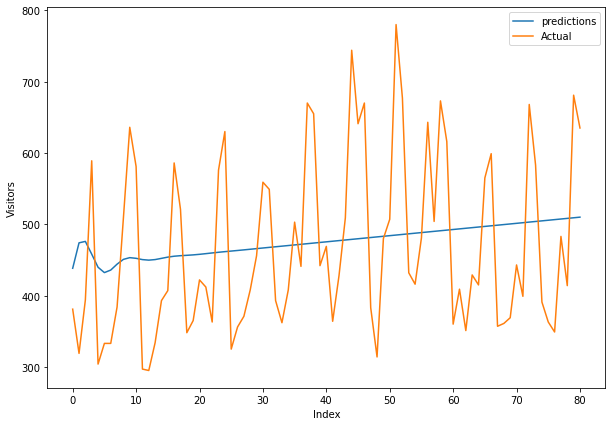

In [21]:
# plot predictions and actual values 
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 7)) 
actuals.plot(legend = True, label = "Actual");

### **Prediction at restaurant level**

Now once you have the predictions at genre level, you need to get the predictions for every restaurant. 

For that you can split the predicted visitors among all restaurants in the genre by looking at the historical share of restaurants in the genre

In [22]:
# Get the data for Yakiniku/Korean food genre
gen_df = df_tsf.loc[df_tsf['air_genre_name'] =="Yakiniku/Korean food",]
gen_df

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
14,past,air_c73d319ffabf287a_2016-01-13,air_c73d319ffabf287a,2016-01-13,19,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Yakiniku/Korean food,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,hpg_e8f879fcbf993278,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri,17,25,57,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken Kōbe-shi Kumoidōri_Yakiniku/Korean food,air_c73d319ffabf287a_2,air_c73d319ffabf287a_2_0,15.393939,16.0,2.0,27.0
109,past,air_2aab19554f91ff82_2016-01-13,air_2aab19554f91ff82,2016-01-13,23,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Yakiniku/Korean food,Tōkyō-to Chūō-ku Ginza,35.672114,139.770825,hpg_cac091abfcee2a85,Japanese style,Tōkyō-to Chūō-ku Ginza,35.6686,139.763043,Tōkyō-to,Chūō-ku,Ginza,14,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Chūō-ku Ginza_Yakiniku/Korean food,air_2aab19554f91ff82_2,air_2aab19554f91ff82_2_0,40.230769,39.0,17.0,76.0
228,past,air_8093d0b565e9dbdf_2016-01-13,air_8093d0b565e9dbdf,2016-01-13,46,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Yakiniku/Korean food,Tōkyō-to Chūō-ku Ginza,35.672114,139.770825,hpg_874415e6e7ccfe13,NaN,NaN,NaN,NaN,Tōkyō-to,Chūō-ku,Ginza,14,43,444,6.0,26.0,19.5,18.166667,57.333333,Tōkyō-to Chūō-ku Ginza_Yakiniku/Korean food,air_8093d0b565e9dbdf_2,air_8093d0b565e9dbdf_2_0,40.276923,41.0,20.0,60.0
231,past,air_1653a6c513865af3_2016-01-13,air_1653a6c513865af3,2016-01-13,46,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Yakiniku/Korean food,Hokkaidō Abashiri-shi Minami 6 Jōhigashi,44.020632,144.273398,NaN,NaN,NaN,NaN,NaN,Hokkaidō,Abashiri-shi,Minami 6 Jōhigashi,2,2,46,1.0,39.0,19.0,18.000000,1.000000,Hokkaidō Abashiri-shi Minami 6 Jōhigashi_Yakin...,air_1653a6c513865af3_2,air_1653a6c513865af3_2_0,31.411765,34.0,2.0,53.0
232,past,air_dfad598ff642dab7_2016-01-13,air_dfad598ff642dab7,2016-01-13,27,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Yakiniku/Korean food,Hokkaidō Abashiri-shi Minami 6 Jōhigashi,44.020632,144.273398,NaN,NaN,NaN,NaN,NaN,Hokkaidō,Abashiri-shi,Minami 6 Jōhigashi,2,2,46,NaN,NaN,NaN,NaN,NaN,Hokkaidō Abashiri-shi Minami 6 Jōhigashi_Yakin...,air_dfad598ff642dab7_2,air_dfad598ff642dab7_2_0,23.507937,20.0,3.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250279,past,air_6c952e3c6e590945_2016-01-31,air_6c952e3c6e590945,2016-01-31,3,Sunday,0,1,1,1,1,1,6,2016,1,31,31,4,True,Yakiniku/Korean food,Miyagi-ken Sendai-shi Kamisugi,38.269076,140.870403,NaN,NaN,NaN,NaN,NaN,Miyagi-ken,Sendai-shi,Kamisugi,17,17,17,NaN,NaN,NaN,NaN,NaN,Miyagi-ken Sendai-shi Kamisugi_Yakiniku/Korean...,air_6c952e3c6e590945_6,air_6c952e3c6e590945_6_0,13.161290,14.0,1.0,38.0
250398,past,air_1653a6c513865af3_2016-01-03,air_1653a6c513865af3,2016-01-03,43,Sunday,1,1,1,1,1,1,6,2016,1,3,31,53,False,Yakiniku/Korean food,Hokkaidō Abashiri-shi Minami 6 Jōhigashi,44.020632,144.273398,NaN,NaN,NaN,NaN,NaN,Hokkaidō,Abashiri-shi,Minami 6 Jōhigashi,2,2,46,NaN,NaN,NaN,NaN,NaN,Hokkaidō Abashiri-shi Minami 6 Jōhigashi_Yakin...,air_1653a6c513865af3_6,air_1653a6c513865af3_6_1,35.333333,36.0,27.0,43.0
250399,past,air_dfad598ff642dab7_2016-01-03,air_dfad598ff642dab7,2016-01-03,19,Sunday,1,1,1,1,1,1,6,2016,1,3,31,53,False,Yakiniku/Korean food,Hokkaidō Abashiri-shi Minami 6 Jōhigashi,44.020632,144.273398,NaN,NaN,NaN,NaN,NaN,Hokkaidō,Abashiri-shi,Minami 6 Jōhigashi,2,2,46,NaN,NaN,NaN,NaN,NaN,Hokkaidō Abashiri-shi

In [23]:
gen_df.reset_index(drop = True, inplace = True)
gen_df.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_c73d319ffabf287a_2016-01-13,air_c73d319ffabf287a,2016-01-13,19,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Yakiniku/Korean food,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,hpg_e8f879fcbf993278,NaN,NaN,NaN,NaN,Hyōgo-ken,Kōbe-shi,Kumoidōri,17,25,57,NaN,NaN,NaN,NaN,NaN,Hyōgo-ken Kōbe-shi Kumoidōri_Yakiniku/Korean food,air_c73d319ffabf287a_2,air_c73d319ffabf287a_2_0,15.393939,16.0,2.0,27.0
1,past,air_2aab19554f91ff82_2016-01-13,air_2aab19554f91ff82,2016-01-13,23,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Yakiniku/Korean food,Tōkyō-to Chūō-ku Ginza,35.672114,139.770825,hpg_cac091abfcee2a85,Japanese style,Tōkyō-to Chūō-ku Ginza,35.6686,139.763043,Tōkyō-to,Chūō-ku,Ginza,14,43,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Chūō-ku Ginza_Yakiniku/Korean food,air_2aab19554f91ff82_2,air_2aab19554f91ff82_2_0,40.230769,39.0,17.0,76.0
2,past,air_8093d0b565e9dbdf_2016-01-13,air_8093d0b565e9dbdf,2016-01-13,46,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Yakiniku/Korean food,Tōkyō-to Chūō-ku Ginza,35.672114,139.770825,hpg_874415e6e7ccfe13,NaN,NaN,NaN,NaN,Tōkyō-to,Chūō-ku,Ginza,14,43,444,6.0,26.0,19.5,18.166667,57.333333,Tōkyō-to Chūō-ku Ginza_Yakiniku/Korean food,air_8093d0b565e9dbdf_2,air_8093d0b565e9dbdf_2_0,40.276923,41.0,20.0,60.0
3,past,air_1653a6c513865af3_2016-01-13,air_1653a6c513865af3,2016-01-13,46,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Yakiniku/Korean food,Hokkaidō Abashiri-shi Minami 6 Jōhigashi,44.020632,144.273398,NaN,NaN,NaN,NaN,NaN,Hokkaidō,Abashiri-shi,Minami 6 Jōhigashi,2,2,46,1.0,39.0,19.0,18.000000,1.000000,Hokkaidō Abashiri-shi Minami 6 Jōhigashi_Yakin...,air_1653a6c513865af3_2,air_1653a6c513865af3_2_0,31.411765,34.0,2.0,53.0
4,past,air_dfad598ff642dab7_2016-01-13,air_dfad598ff642dab7,2016-01-13,27,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Yakiniku/Korean food,Hokkaidō Abashiri-shi Minami 6 Jōhigashi,44.020632,144.273398,NaN,NaN,NaN,NaN,NaN,Hokkaidō,Abashiri-shi,Minami 6 Jōhigashi,2,2,46,NaN,NaN,NaN,NaN,NaN,Hokkaidō Abashiri-shi Minami 6 Jōhigashi_Yakin...,air_dfad598ff642dab7_2,air_dfad598ff642dab7_2_0,23.507937,20.0,3.0,67.0


**Total Visitors by each restaurant**

In [24]:
# Aggregate the data by air_store_id to compute the total visitors for every restaurant in the past
store_visitor_df = gen_df.groupby(['air_store_id'], as_index=False).agg({'visitors': np.sum})
store_visitor_df.head()

,air_store_id,visitors
0,air_08f994758a1e76d4,7569
1,air_1653a6c513865af3,13913
2,air_2aab19554f91ff82,13292
3,air_2bffb19a24d11729,5014
4,air_2fc478dc9f0a6b31,2934


**Restaurant Share**

In [25]:
# Get the share of every restaurant in the genre
store_visitor_df['restaurant_share'] = store_visitor_df['visitors']/store_visitor_df['visitors'].sum()
store_visitor_df.head()

,air_store_id,visitors,restaurant_share
0,air_08f994758a1e76d4,7569,0.050737
1,air_1653a6c513865af3,13913,0.093262
2,air_2aab19554f91ff82,13292,0.089099
3,air_2bffb19a24d11729,5014,0.033610
4,air_2fc478dc9f0a6b31,2934,0.019667


In [26]:
test

,visit_date,visitors
396,2017-02-01,381
397,2017-02-02,319
398,2017-02-03,394
399,2017-02-04,589
400,2017-02-05,304
401,2017-02-06,333
402,2017-02-07,333
403,2017-02-08,384
404,2017-02-09,509
405,2017-02-10,636


**Cartesian Merge**

In [27]:
# Merge the prediction df and store_visitor df 
store_visitor_df['tmp'] = 1
prediction_df['tmp'] = 1

restaurant_prediction_df = pd.merge(prediction_df, store_visitor_df.drop('visitors', axis = 1), on=['tmp'])
restaurant_prediction_df = restaurant_prediction_df.drop('tmp', axis=1)
restaurant_prediction_df.shape

(1863, 4)

In [28]:
# First 50 rows of merged dataframe
restaurant_prediction_df.head(50)

,visit_date,predictions,air_store_id,restaurant_share
0,2017-02-01,438.328146,air_08f994758a1e76d4,0.050737
1,2017-02-01,438.328146,air_1653a6c513865af3,0.093262
2,2017-02-01,438.328146,air_2aab19554f91ff82,0.089099
3,2017-02-01,438.328146,air_2bffb19a24d11729,0.033610
4,2017-02-01,438.328146,air_2fc478dc9f0a6b31,0.019667
5,2017-02-01,438.328146,air_396166d47733d5c9,0.039690
6,2017-02-01,438.328146,air_3f91d592acd6cc0b,0.040856
7,2017-02-01,438.328146,air_42d41eb58cad170e,0.043095
8,2017-02-01,438.328146,air_52e2a1fd42bc917a,0.018333
9,2017-02-01,438.328146,air_5e70fe82f9e4fab6,0.038376


**Visitors split by restaurant share**

In [29]:
# Split the genre level prediction to restaurant level prediction
restaurant_prediction_df['visitors_predicted'] = restaurant_prediction_df['restaurant_share']*restaurant_prediction_df['predictions']
restaurant_prediction_df.head()

,visit_date,predictions,air_store_id,restaurant_share,visitors_predicted
0,2017-02-01,438.328146,air_08f994758a1e76d4,0.050737,22.239317
1,2017-02-01,438.328146,air_1653a6c513865af3,0.093262,40.879325
2,2017-02-01,438.328146,air_2aab19554f91ff82,0.089099,39.054696
3,2017-02-01,438.328146,air_2bffb19a24d11729,0.033610,14.732188
4,2017-02-01,438.328146,air_2fc478dc9f0a6b31,0.019667,8.620710


**Actual visitors for each restaurant**

In [30]:
# y actual
restaurant_df_actual = gen_df.loc[gen_df.visit_date >= '2017-02-01', ['air_store_id', 'visit_date', 'visitors']]
restaurant_df_actual.reset_index(drop = True, inplace = True)
restaurant_df_actual.head()

,air_store_id,visit_date,visitors
0,air_b80fed1a07c817d2,2017-02-01,3
1,air_627cabe2fe53f33f,2017-02-01,11
2,air_c73d319ffabf287a,2017-02-01,11
3,air_a546cbf478a8b6e4,2017-02-01,16
4,air_a9133955abccf071,2017-02-01,21


**Evaluate**

In [31]:
# evaluation_df
evaluation_df = pd.merge(restaurant_prediction_df.drop('predictions', axis = 1), restaurant_df_actual, on = ['air_store_id', 'visit_date'])
evaluation_df.head()

,visit_date,air_store_id,restaurant_share,visitors_predicted,visitors
0,2017-02-01,air_08f994758a1e76d4,0.050737,22.239317,34
1,2017-02-01,air_1653a6c513865af3,0.093262,40.879325,19
2,2017-02-01,air_2aab19554f91ff82,0.089099,39.054696,64
3,2017-02-01,air_2bffb19a24d11729,0.033610,14.732188,18
4,2017-02-01,air_396166d47733d5c9,0.039690,17.397145,9


In [32]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n RMSLE : \n", RMSLE(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n MAPE : \n", mean_absolute_percentage_error(evaluation_df.visitors_predicted, evaluation_df.visitors))


 MAE : 
  10.673274110053951

 RMSLE : 
 0.6763784358290398

 MAPE : 
 63.86870936605737


## **14. Build Auto ARIMA - SARIMA model**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>14. Build Auto ARIMA - SARIMA model</h2>
</div>

### **SARIMA Modeling at Genre Level and then split Restaurants share**

Let's build a Seasonal ARIMA model at genre level and then go to restaurant level.

In [33]:
train.head()

,visit_date,visitors
0,2016-01-02,60
1,2016-01-03,62
2,2016-01-04,113
3,2016-01-05,90
4,2016-01-06,132


In [34]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1, 
                      max_p = 3, max_q = 3, m = 7, 
                      start_P = 0, seasonal = True, 
                      d = None, D = 1, trace = True, 
                      error_action ='ignore',   
                      suppress_warnings = True,  
                      stepwise = True,  max_D=2, max_order=5)  
  
# To print the summary 
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=4371.468, Time=0.56 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=4536.810, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=4457.226, Time=0.39 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=4402.662, Time=0.28 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=4536.953, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=4503.985, Time=0.20 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=4364.679, Time=0.78 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=4458.946, Time=0.42 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=4363.831, Time=3.14 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=4429.453, Time=1.55 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=inf, Time=3.27 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=4365.112, Time=2.80 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=4369.736, Time=1.65 sec
 ARIMA(2,0,1)(2,1,1)[7] intercept   : AIC=4

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  396
Model:             SARIMAX(2, 0, 1)x(2, 1, [1, 2], 7)   Log Likelihood               -2166.193
Date:                                Wed, 25 Jan 2023   AIC                           4350.386
Time:                                        09:41:02   BIC                           4386.059
Sample:                                             0   HQIC                          4364.528
                                                - 396                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0939      0.112      0.836      0.403      -0.126       0.314
ar.L1          1.2348      0.058     21.290      0.000       1.121       1.349
ar.L2         -0.2602      0.045     -5.777      0.000      -0.348      -0.172
ma.L1         -0.8519      0.047    -18.056      0.000      -0.944      -0.759
ar.S.L7        0.5619      0.429      1.311      0.190      -0.278       1.402
ar.S.L14      -0.1801      0.080     -2.255      0.024      -0.337      -0.024
ma.S.L7       -1.3203      0.432     -3.058      0.002      -2.166      -0.474
ma.S.L14       0.3932      0.395      0.996      0.319      -0.381       1.167
sigma2      3905.8318    158.366     24.663      0.000    3595.440    4216.224
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               732.44
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               6.29   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Get prediction for test duration
predictions = pd.Series(model.predict(len(test)))
actuals = test['visitors'].reset_index(drop = True)

In [36]:
def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [37]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(actuals,predictions))


 MAE : 
  56.786072252157666

 RMSLE : 
 0.15614853215721575

 MAPE : 
 nan


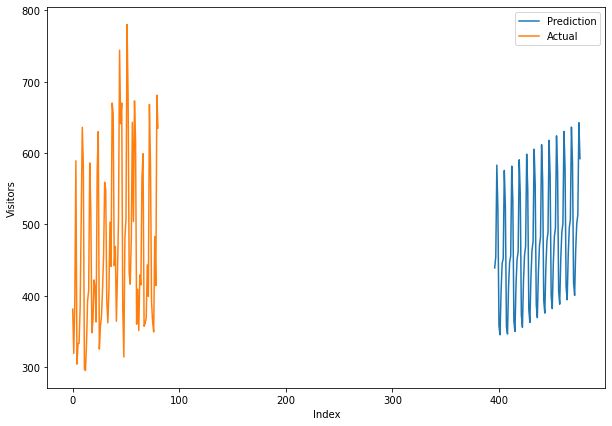

In [38]:
# plot predictions and actual values 
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 7)) 
actuals.plot(legend = True, label = "Actual");

#### Prediction at restaurant level

In [39]:
# Create a dataframe which contains the visit date and corresponding visitors prediction
prediction_df = pd.DataFrame({'visit_date' : test['visit_date'].reset_index(drop = True),
                              'visitors'   : predictions.reset_index(drop = True)
                              })
prediction_df.head()

,visit_date,visitors
0,2017-02-01,438.821237
1,2017-02-02,454.300042
2,2017-02-03,582.970392
3,2017-02-04,519.948853
4,2017-02-05,357.226719


In [40]:
store_visitor_df

,air_store_id,visitors,restaurant_share,tmp
0,air_08f994758a1e76d4,7569,0.050737,1
1,air_1653a6c513865af3,13913,0.093262,1
2,air_2aab19554f91ff82,13292,0.089099,1
3,air_2bffb19a24d11729,5014,0.033610,1
4,air_2fc478dc9f0a6b31,2934,0.019667,1
5,air_396166d47733d5c9,5921,0.039690,1
6,air_3f91d592acd6cc0b,6095,0.040856,1
7,air_42d41eb58cad170e,6429,0.043095,1
8,air_52e2a1fd42bc917a,2735,0.018333,1
9,air_5e70fe82f9e4fab6,5725,0.038376,1


In [41]:
# Merge the prediction df and store_visitor df 
store_visitor_df['tmp'] = 1
prediction_df['tmp'] = 1

restaurant_prediction_df = pd.merge(prediction_df, store_visitor_df.drop('visitors', axis = 1), on=['tmp'])
restaurant_prediction_df = restaurant_prediction_df.drop('tmp', axis=1)
restaurant_prediction_df.shape

(1863, 4)

In [42]:
# First 50 rows of merged dataframe
restaurant_prediction_df.head(50)

,visit_date,visitors,air_store_id,restaurant_share
0,2017-02-01,438.821237,air_08f994758a1e76d4,0.050737
1,2017-02-01,438.821237,air_1653a6c513865af3,0.093262
2,2017-02-01,438.821237,air_2aab19554f91ff82,0.089099
3,2017-02-01,438.821237,air_2bffb19a24d11729,0.033610
4,2017-02-01,438.821237,air_2fc478dc9f0a6b31,0.019667
5,2017-02-01,438.821237,air_396166d47733d5c9,0.039690
6,2017-02-01,438.821237,air_3f91d592acd6cc0b,0.040856
7,2017-02-01,438.821237,air_42d41eb58cad170e,0.043095
8,2017-02-01,438.821237,air_52e2a1fd42bc917a,0.018333
9,2017-02-01,438.821237,air_5e70fe82f9e4fab6,0.038376


In [43]:
# Split the genre level prediction to restaurant level prediction
restaurant_prediction_df['visitors_predicted'] = restaurant_prediction_df['restaurant_share']*restaurant_prediction_df['visitors']

restaurant_prediction_df.head()

,visit_date,visitors,air_store_id,restaurant_share,visitors_predicted
0,2017-02-01,438.821237,air_08f994758a1e76d4,0.050737,22.264334
1,2017-02-01,438.821237,air_1653a6c513865af3,0.093262,40.925312
2,2017-02-01,438.821237,air_2aab19554f91ff82,0.089099,39.098630
3,2017-02-01,438.821237,air_2bffb19a24d11729,0.033610,14.748761
4,2017-02-01,438.821237,air_2fc478dc9f0a6b31,0.019667,8.630408


In [44]:
# evaluation_df
evaluation_df = pd.merge(restaurant_prediction_df.drop('visitors', axis = 1), restaurant_df_actual, on = ['air_store_id', 'visit_date'])
evaluation_df.head()



,visit_date,air_store_id,restaurant_share,visitors_predicted,visitors
0,2017-02-01,air_08f994758a1e76d4,0.050737,22.264334,34
1,2017-02-01,air_1653a6c513865af3,0.093262,40.925312,19
2,2017-02-01,air_2aab19554f91ff82,0.089099,39.098630,64
3,2017-02-01,air_2bffb19a24d11729,0.033610,14.748761,18
4,2017-02-01,air_396166d47733d5c9,0.039690,17.416716,9


In [45]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n RMSLE : \n", RMSLE(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n MAPE : \n", mean_absolute_percentage_error(evaluation_df.visitors_predicted, evaluation_df.visitors))


 MAE : 
  10.33624035045197

 RMSLE : 
 0.6593136592105519

 MAPE : 
 62.41622138471223


### **SARIMA Modeling directly at Restaurant Level**

In [46]:
air_store_id = df_tsf.air_store_id.unique()
air_store_id[:10]

array(['air_ba937bf13d40fb24', 'air_25e9888d30b386df',
       'air_fd6aac1043520e83', 'air_64d4491ad8cdb1c6',
       'air_ee3a01f0c71a769f', 'air_9438d67241c81314',
       'air_d0e8a085d8dc83aa', 'air_5c65468938c07fa5',
       'air_9fc607777ad76b26', 'air_326ca454ef3558bc'], dtype=object)

In [47]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT
df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[4], :]

# Get the train dataset, we will use the data till end of Jan 2017 for training
train_selector = df_tsf_restaurant.visit_date < '2017-02-01'
train = df_tsf_restaurant[train_selector]

test_selector = df_tsf_restaurant.visit_date >= '2017-02-01'
test = df_tsf_restaurant[test_selector]

In [48]:
df_tsf_restaurant.reset_index(drop=True, inplace=True)
df_tsf_restaurant.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_ee3a01f0c71a769f_2016-01-13,air_ee3a01f0c71a769f,2016-01-13,18,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.72594,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,13,13,18,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...,air_ee3a01f0c71a769f_2,air_ee3a01f0c71a769f_2_0,18.084746,18.0,4.0,39.0
1,past,air_ee3a01f0c71a769f_2016-01-15,air_ee3a01f0c71a769f,2016-01-15,10,Friday,0,0,0,0,0,1,4,2016,1,15,31,2,False,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.72594,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,13,13,18,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...,air_ee3a01f0c71a769f_4,air_ee3a01f0c71a769f_4_0,16.280702,16.0,4.0,38.0
2,past,air_ee3a01f0c71a769f_2016-01-16,air_ee3a01f0c71a769f,2016-01-16,34,Saturday,0,1,1,1,1,1,5,2016,1,16,31,2,False,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.72594,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,13,13,18,3.0,6.0,14.333333,14.0,32.333333,Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...,air_ee3a01f0c71a769f_5,air_ee3a01f0c71a769f_5_0,39.983607,38.0,20.0,71.0
3,past,air_ee3a01f0c71a769f_2016-01-18,air_ee3a01f0c71a769f,2016-01-18,14,Monday,0,0,0,0,0,1,0,2016,1,18,31,3,False,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.72594,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,13,13,18,1.0,2.0,13.000000,15.0,190.000000,Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...,air_ee3a01f0c71a769f_0,air_ee3a01f0c71a769f_0_0,20.789474,18.0,6.0,61.0
4,past,air_ee3a01f0c71a769f_2016-01-19,air_ee3a01f0c71a769f,2016-01-19,5,Tuesday,0,0,0,0,0,1,1,2016,1,19,31,3,False,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.72594,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken,Hamamatsu-shi,Motoshirochō,13,13,18,NaN,NaN,NaN,NaN,NaN,Shizuoka-ken Hamamatsu-shi Motoshirochō_Cafe/S...,air_ee3a01f0c71a769f_1,air_ee3a01f0c71a769f_1_0,16.750000,17.0,4.0,41.0


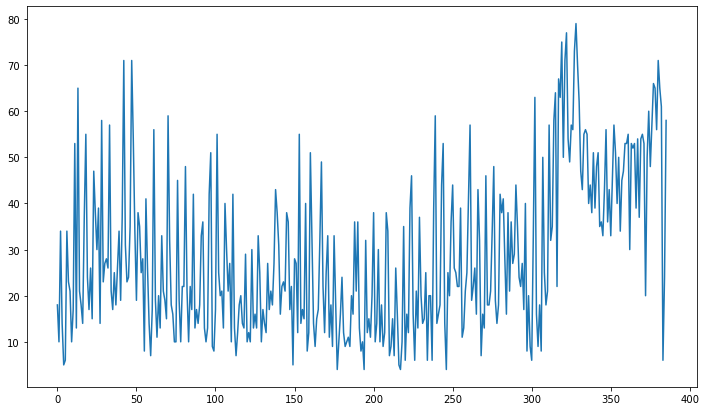

In [49]:
# Plot
df_tsf_restaurant.visitors.plot(figsize=(12, 7));

In [50]:
# Fit auto_arima on train set
# Fit auto_arima on train set
# model = pm.auto_arima(train.visitors, 
#                       start_p = 1, 
#                       start_q = 1, 
#                       max_p = 3, 
#                       max_q = 3, 
#                       m = 7, 
#                       start_P = 0, 
#                       seasonal = True, 
#                       d = None, 
#                       D = 1, 
#                       trace = True, 
#                       error_action ='ignore',   
#                       suppress_warnings = True,  
#                       stepwise = True,  
#                       max_D=2, 
#                       max_order=5)  

model = pm.auto_arima(train.visitors, 
                      start_p = 1,
                      start_q = 1,
                      max_p = 5,
                      max_q = 3,
                      seasonal = True, 
                      m = 7,
                      d = 1,
                      # max_d = 3, 
                      trace = True, 
                      error_action ='ignore',   
                      suppress_warnings = True,  
                      start_P = 1,
                      start_Q = 1,
                      max_P = 3,
                      max_Q = 2,
                      D = 1,  # Force Seasonal Differencing 
                      max_order = 7,
                      stepwise = True)  
  
# To print the summary 
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=2912.712, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=2744.365, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.68 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=2883.660, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=2722.304, Time=0.27 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=2706.676, Time=0.40 sec
 ARIMA(1,1,0)(3,1,1)[7]             : AIC=inf, Time=1.02 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(3,1,0)[7]             : AIC=2761.538, Time=0.22 sec
 ARIMA(2,1,0)(3,1,0)[7]             : AIC=2672.226, Time=0.42 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=2684.534, Time=0.30 sec
 ARIMA(2,1,0)(3,1,1)[7]             : AIC=inf, Time=3.23 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=1.70 sec
 ARIMA(3,1,0)(3,1,0)[7]             : AIC=2634.516, Time=0.41 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  319
Model:             SARIMAX(5, 1, 0)x(3, 1, 0, 7)   Log Likelihood               -1283.076
Date:                           Wed, 25 Jan 2023   AIC                           2584.152
Time:                                   09:41:41   BIC                           2617.810
Sample:                                        0   HQIC                          2597.606
                                           - 319                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8240      0.054    -15.243      0.000      -0.930      -0.718
ar.L2         -0.7896      0.080     -9.895      0.000      -0.946      -0.633
ar.L3         -0.7106      0.078     -9.143      0.000      -0.863      -0.558
ar.L4         -0.4821      0.079     -6.111      0.000      -0.637      -0.327
ar.L5         -0.0980      0.060     -1.642      0.101      -0.215       0.019
ar.S.L7       -0.7186      0.059    -12.183      0.000      -0.834      -0.603
ar.S.L14      -0.4551      0.075     -6.088      0.000      -0.602      -0.309
ar.S.L21      -0.2675      0.061     -4.355      0.000      -0.388      -0.147
sigma2       219.3255     15.299     14.336      0.000     189.341     249.310
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.08
Prob(Q):                              0.96   Prob(JB):                         0.02
Heteroskedasticity (H):               1.21   Skew:                             0.03
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Predict

In [51]:
# Get prediction for test duration
predictions = pd.Series(model.predict(len(test)))
predictions = predictions.map(lambda x: x if x >= 0 else 0)

actuals = test['visitors'].reset_index(drop = True)

#### Evaluate

In [52]:
# Evaluation Metric
print("\n MAE : \n ",  mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n",  mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  15.254695096786318

 RMSLE : 
 0.6715878442120976

 MAPE : 
 nan


#### Plot

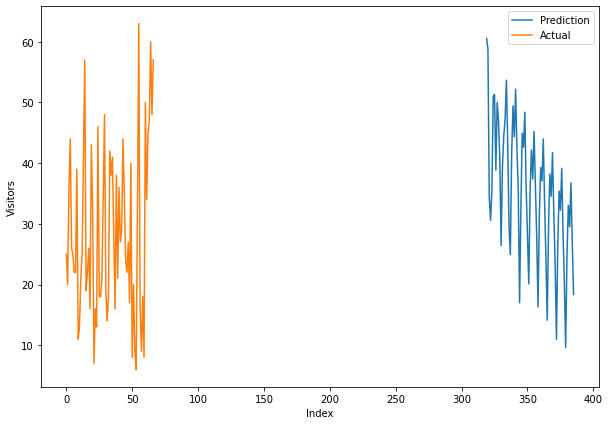

In [53]:
# plot predictions and actual values 
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 7)) 
actuals.plot(legend = True, label = "Actual");

### **Forecast and Evaluate for Multiple Restaurants**

air_ba937bf13d40fb24
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=2432.997, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=2641.184, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=2578.772, Time=0.10 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=2434.904, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=2639.186, Time=0.02 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=2436.504, Time=0.22 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=2436.958, Time=0.28 sec
 ARIMA(1,1,1)(2,0,1)[7] intercept   : AIC=2436.791, Time=0.68 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=2434.296, Time=1.57 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=2436.478, Time=0.11 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=2433.635, Time=0.82 sec
 ARIMA(1,1,1)(2,0,0)[7] intercept   : AIC=2435.079, Time=0.39 sec
 ARIMA(1,1,1)(2,0,2)[7] intercept   : AIC=2435.619, Time=1.86 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=2431.559, Time=0.28 sec
 ARIMA(0,1,1

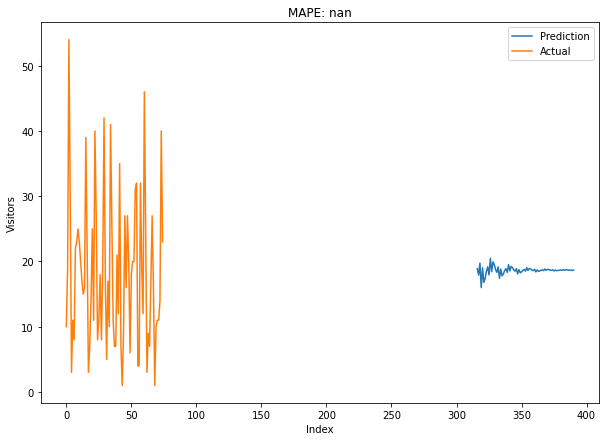

air_25e9888d30b386df
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=1810.807, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1952.119, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1898.925, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1809.455, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1950.138, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1807.471, Time=0.05 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=1809.455, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=1811.456, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=1807.616, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=1807.489, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1897.807, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=1809.452, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=1808.236, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7] intercept
Total fit time: 1.332 seconds



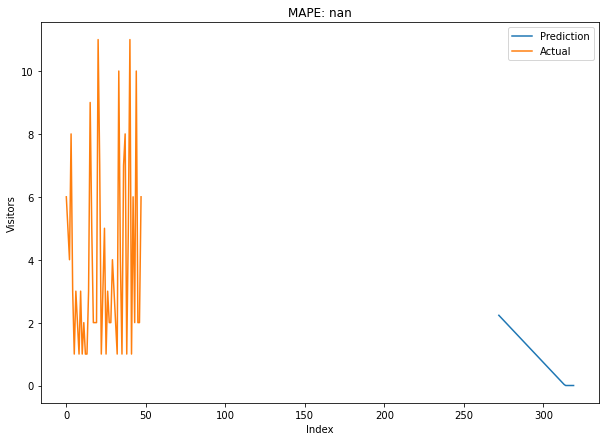

In [55]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT
mapes, rmsles, maes = [], [], []

for i in range(2):
    print("==============================================")
    print(air_store_id[i]);
    df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[i], :]

    # Get the train dataset, we will use the data till end of Jan 2017 for training
    train_selector = df_tsf_restaurant.visit_date < '2017-02-01'
    train = df_tsf_restaurant[train_selector]

    test_selector = df_tsf_restaurant.visit_date >= '2017-02-01'
    test = df_tsf_restaurant[test_selector]

    # Fit auto_arima on train set
    model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1, 
                            max_p = 3, max_q = 3, m = 7, 
                            seasonal = True, 
                            d = None, trace = True, 
                            error_action ='ignore',   
                            suppress_warnings = True,  
                            stepwise = True)  

    # To print the summary 
    model.summary()


    # Get prediction for test duration
    predictions = pd.Series(model.predict(len(test)))
    predictions = predictions.map(lambda x: x if x >= 0 else 0)

    actuals = test['visitors'].reset_index(drop = True)

    # Evaluation Metric
    mape  = mean_absolute_percentage_error(predictions, actuals)
    rmsle = RMSLE(predictions, actuals)
    mae = mean_absolute_error(predictions, actuals)

    print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))
    print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
    print("\n RMSLE : \n", RMSLE(predictions, actuals))

    mapes.append(round(mape, 2))
    rmsles.append(rmsle)
    maes.append(mae)

    # plot predictions and actual values 
    predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 7)) 
    actuals.plot(legend = True, label = "Actual");
    plt.title(f"MAPE: {mape}")
    plt.show()

**Replace Infinite with NaN values, to calculate mean**

In [56]:
mapes_clean = pd.Series(mapes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
maes_clean = pd.Series(maes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
rmsles_clean = pd.Series(rmsles).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)

Calculate mean

In [57]:
print("MAPES : ", np.nanmean(mapes_clean).round(2), mapes_clean)
print("MAES  : ", np.nanmean(maes_clean).round(2), maes_clean)
print("RMSLES: ", np.nanmean(rmsles_clean).round(2), rmsles_clean)

MAPES :  nan [nan nan]
MAES  :  6.1 [9.2  3.01]
RMSLES:  0.91 [0.74 1.08]


## **15. Build Auto ARIMA - SARIMAX model**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>15. Build Auto ARIMA - SARIMAX model</h2>
</div>

- Seasonality = 7 days in a week

We will use 'Holiday Flag' as the external regressor here, but practically it can be any of the X variables.

### **Types of External Regressors**

1. Time Based
2. Demographics: People and Location based
3. Qualitative / Rating based
4. Promotions 
5. Series Decomposition
6. Macroeconomic Data


In [58]:
train.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
1,past,air_25e9888d30b386df_2016-01-13,air_25e9888d30b386df,2016-01-13,21,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Shinagawa-ku,Higashigotanda,2,7,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinagawa-ku Higashigotanda_Izakaya,air_25e9888d30b386df_2,air_25e9888d30b386df_2_0,6.760000,4.0,1.0,28.0
261,past,air_25e9888d30b386df_2016-01-14,air_25e9888d30b386df,2016-01-14,8,Thursday,0,0,0,0,0,1,3,2016,1,14,31,2,False,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Shinagawa-ku,Higashigotanda,2,7,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinagawa-ku Higashigotanda_Izakaya,air_25e9888d30b386df_3,air_25e9888d30b386df_3_0,5.617021,5.0,1.0,25.0
532,past,air_25e9888d30b386df_2016-01-15,air_25e9888d30b386df,2016-01-15,21,Friday,0,0,0,0,0,1,4,2016,1,15,31,2,False,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Shinagawa-ku,Higashigotanda,2,7,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinagawa-ku Higashigotanda_Izakaya,air_25e9888d30b386df_4,air_25e9888d30b386df_4_0,11.714286,9.0,1.0,50.0
819,past,air_25e9888d30b386df_2016-01-16,air_25e9888d30b386df,2016-01-16,17,Saturday,0,1,1,1,1,1,5,2016,1,16,31,2,False,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Shinagawa-ku,Higashigotanda,2,7,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinagawa-ku Higashigotanda_Izakaya,air_25e9888d30b386df_5,air_25e9888d30b386df_5_0,6.683333,5.0,1.0,33.0
1323,past,air_25e9888d30b386df_2016-01-19,air_25e9888d30b386df,2016-01-19,15,Tuesday,0,0,0,0,0,1,1,2016,1,19,31,3,False,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Shinagawa-ku,Higashigotanda,2,7,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Shinagawa-ku Higashigotanda_Izakaya,air_25e9888d30b386df_1,air_25e9888d30b386df_1_0,5.234043,3.0,1.0,22.0


In [59]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors, 
                      start_p = 1, 
                      start_q = 1, 
                      max_p = 3, 
                      max_q = 3, 
                      m = 7, 
                      start_P = 0, 
                      seasonal = True, 
                      d = None, 
                      max_D = 1, 
                      trace = True, 
                      error_action ='ignore',   
                      suppress_warnings = True,  
                      stepwise = True, 
                      max_order=7,
                      X=train.loc[:, 'holiday_flg'].values.reshape(-1, 1))  

  
# To print the summary 
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=1809.541, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1953.137, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1899.378, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1809.321, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1951.156, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1807.330, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=1809.321, Time=0.19 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=1811.321, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=1807.551, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=1807.443, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1898.234, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=1809.419, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=1808.383, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[7] intercept
Total fit time: 1.908 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  272
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -899.665
Date:                Wed, 25 Jan 2023   AIC                           1807.330
Time:                        09:42:53   BIC                           1821.738
Sample:                             0   HQIC                          1813.115
                                - 272                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0535      0.035     -1.545      0.122      -0.121       0.014
x1             3.0580      1.785      1.713      0.087      -0.440       6.556
ma.L1         -0.9375      0.023    -40.312      0.000      -0.983      -0.892
sigma2        44.4317      2.533     17.541      0.000      39.467      49.396
===================================================================================
Ljung-Box (L1) (Q):                   1.61   Jarque-Bera (JB):               236.22
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             1.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
# Get prediction for test duration
predictions = pd.Series(model.predict(n_periods=len(test),
                                      X=test.loc[:, 'holiday_flg'].values.reshape(-1, 1)))

actuals = test['visitors'].reset_index(drop = True)

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [62]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  3.1650220926614225

 MAPE : 
 nan


<AxesSubplot:xlabel='Index', ylabel='Visitors'>

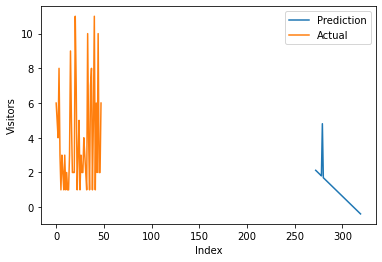

In [63]:
# plot predictions and actual values 
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors") 
actuals.plot(legend = True, label = "Actual")

### Include multiple external regressors

In [64]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors, 
                      start_p = 1, 
                      start_q = 1, 
                      max_p = 3, 
                      max_q = 3, 
                      m = 7, 
                      start_P = 0, 
                      seasonal = True, 
                      d = None, 
                      max_D = 1, 
                      trace = True, 
                      error_action ='ignore',   
                      suppress_warnings = True,  
                      stepwise = True, 
                      max_order=7,
                      X=train.loc[:, ['holiday_flg', 
                                      'tomorrow_is_holiday', 
                                      'yesterday_is_holiday']].values)  

  
# To print the summary 
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=1809.752, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1945.689, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1900.806, Time=0.31 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=1810.442, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1943.703, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=1807.791, Time=0.33 sec
 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=1809.748, Time=0.55 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=1811.539, Time=0.68 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=1808.593, Time=0.25 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=1900.191, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=1808.204, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=1809.267, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=1807.405, Time=0.35 sec
 ARIMA(0,1,2)(1,0,0)[7] intercept   : AIC=1809.380, Time=0.50 sec
 ARIMA(0,1,2)(0,0,1)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  272
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -896.702
Date:                Wed, 25 Jan 2023   AIC                           1807.405
Time:                        09:43:35   BIC                           1832.620
Sample:                             0   HQIC                          1817.529
                                - 272                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0475      0.035     -1.363      0.173      -0.116       0.021
x1             3.8254      1.884      2.030      0.042       0.132       7.519
x2            -1.7204      3.120     -0.551      0.581      -7.835       4.394
x3            -0.2061      2.989     -0.069      0.945      -6.064       5.652
ma.L1         -0.8233      0.054    -15.206      0.000      -0.929      -0.717
ma.L2         -0.1145      0.052     -2.203      0.028      -0.216      -0.013
sigma2        43.4846      2.473     17.586      0.000      38.638      48.331
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               230.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.28   Skew:                             1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
# Get prediction for test duration
predictions = pd.Series(model.predict(n_periods=len(test),
                                      X=test.loc[:, ['holiday_flg', 
                                                     'tomorrow_is_holiday', 
                                                     'yesterday_is_holiday']].values))

actuals = test['visitors'].reset_index(drop = True)

In [67]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  2.700276731050183

 MAPE : 
 nan


<AxesSubplot:xlabel='Index', ylabel='Visitors'>

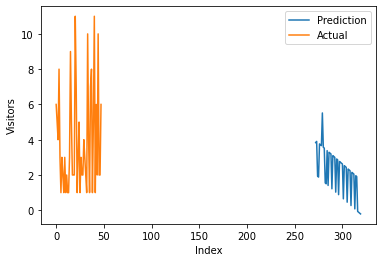

In [68]:
# plot predictions and actual values 
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors") 
actuals.plot(legend = True, label = "Actual")

### Prediction at restaurant level

In [69]:
# Create a dataframe which contains the visit date and corresponding visitors prediction
prediction_df = pd.DataFrame({'visit_date' : test['visit_date'].reset_index(drop = True),
                              'visitors'   : predictions.reset_index(drop = True)
                              })
prediction_df.head()

,visit_date,visitors
0,2017-02-01,3.835300
1,2017-02-03,3.903288
2,2017-02-04,1.929286
3,2017-02-05,1.881806
4,2017-02-07,3.760849


In [70]:
# Merge the prediction df and store_visitor df 
store_visitor_df['tmp'] = 1
prediction_df['tmp'] = 1

restaurant_prediction_df = pd.merge(prediction_df, store_visitor_df.drop('visitors', axis = 1), on=['tmp'])
restaurant_prediction_df = restaurant_prediction_df.drop('tmp', axis=1)
restaurant_prediction_df.shape

(1104, 4)

In [71]:
# First 50 rows of merged dataframe
restaurant_prediction_df.head(50)

,visit_date,visitors,air_store_id,restaurant_share
0,2017-02-01,3.835300,air_08f994758a1e76d4,0.050737
1,2017-02-01,3.835300,air_1653a6c513865af3,0.093262
2,2017-02-01,3.835300,air_2aab19554f91ff82,0.089099
3,2017-02-01,3.835300,air_2bffb19a24d11729,0.033610
4,2017-02-01,3.835300,air_2fc478dc9f0a6b31,0.019667
5,2017-02-01,3.835300,air_396166d47733d5c9,0.039690
6,2017-02-01,3.835300,air_3f91d592acd6cc0b,0.040856
7,2017-02-01,3.835300,air_42d41eb58cad170e,0.043095
8,2017-02-01,3.835300,air_52e2a1fd42bc917a,0.018333
9,2017-02-01,3.835300,air_5e70fe82f9e4fab6,0.038376


In [72]:
# Split the genre level prediction to restaurant level prediction
restaurant_prediction_df['visitors_predicted'] = restaurant_prediction_df['restaurant_share']*restaurant_prediction_df['visitors']

restaurant_prediction_df.head()

,visit_date,visitors,air_store_id,restaurant_share,visitors_predicted
0,2017-02-01,3.8353,air_08f994758a1e76d4,0.050737,0.194590
1,2017-02-01,3.8353,air_1653a6c513865af3,0.093262,0.357687
2,2017-02-01,3.8353,air_2aab19554f91ff82,0.089099,0.341722
3,2017-02-01,3.8353,air_2bffb19a24d11729,0.033610,0.128904
4,2017-02-01,3.8353,air_2fc478dc9f0a6b31,0.019667,0.075430


In [73]:
# evaluation_df
evaluation_df = pd.merge(restaurant_prediction_df.drop('visitors', axis = 1), restaurant_df_actual, on = ['air_store_id', 'visit_date'])
evaluation_df.head()

,visit_date,air_store_id,restaurant_share,visitors_predicted,visitors
0,2017-02-01,air_08f994758a1e76d4,0.050737,0.194590,34
1,2017-02-01,air_1653a6c513865af3,0.093262,0.357687,19
2,2017-02-01,air_2aab19554f91ff82,0.089099,0.341722,64
3,2017-02-01,air_2bffb19a24d11729,0.033610,0.128904,18
4,2017-02-01,air_396166d47733d5c9,0.039690,0.152222,9


In [75]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n MAPE : \n", mean_absolute_percentage_error(evaluation_df.visitors_predicted, evaluation_df.visitors))


 MAE : 
  23.482744753411797

 MAPE : 
 94766.28438734353


### **Forecast Multiple Restaurants using SARIMAX for each Restaurant**


air_ba937bf13d40fb24
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=2433.759, Time=4.02 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=2637.040, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=2573.001, Time=1.17 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=2429.860, Time=1.93 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=2635.042, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=2433.261, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=2431.843, Time=1.74 sec
 ARIMA(0,1,1)(0,0,2)[30] intercept   : AIC=2431.833, Time=5.92 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=2429.915, Time=1.41 sec
 ARIMA(0,1,1)(1,0,2)[30] intercept   : AIC=2433.716, Time=7.01 sec
 ARIMA(0,1,0)(0,0,1)[30] intercept   : AIC=2636.620, Time=0.46 sec
 ARIMA(1,1,1)(0,0,1)[30] intercept   : AIC=2431.773, Time=1.99 sec
 ARIMA(0,1,2)(0,0,1)[30] intercept   : AIC=2431.732, Time=1.99 sec
 ARIMA(1,1,0)(0,0,1)[30] intercept   : AIC=2572.964, Time=1.32 se

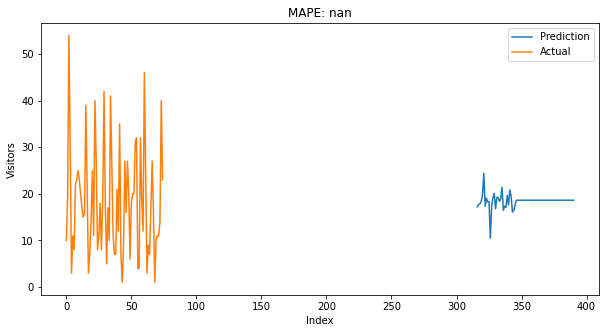

air_25e9888d30b386df
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[30] intercept   : AIC=inf, Time=2.27 sec
 ARIMA(0,1,0)(0,0,0)[30] intercept   : AIC=1953.137, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[30] intercept   : AIC=1898.907, Time=0.79 sec
 ARIMA(0,1,1)(0,0,1)[30] intercept   : AIC=1808.951, Time=1.27 sec
 ARIMA(0,1,0)(0,0,0)[30]             : AIC=1951.156, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[30] intercept   : AIC=1807.330, Time=0.08 sec
 ARIMA(0,1,1)(1,0,0)[30] intercept   : AIC=1808.899, Time=0.85 sec
 ARIMA(0,1,1)(1,0,1)[30] intercept   : AIC=1809.684, Time=1.69 sec
 ARIMA(1,1,1)(0,0,0)[30] intercept   : AIC=1807.551, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[30] intercept   : AIC=1807.443, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[30] intercept   : AIC=1898.234, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[30] intercept   : AIC=1809.419, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[30]             : AIC=1808.383, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[30] intercept
Total fit time: 7.669 

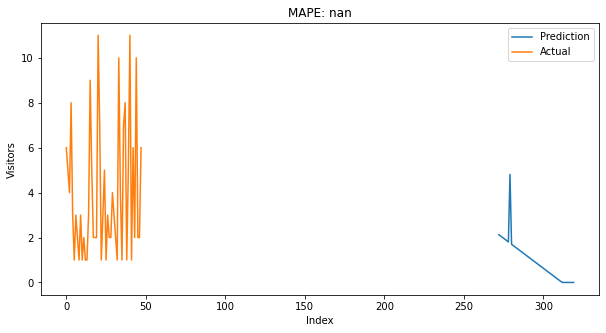

In [76]:
# CREATE TRAIN AND TEST DATA FOR PARTICULAR RESTAURANT
mapes, rmsles, maes = [], [], []

for i in range(2):
    print("==============================================")
    print(air_store_id[i]);
    df_tsf_restaurant = df_tsf.loc[df_tsf['air_store_id']==air_store_id[i], :]

    # Get the train dataset, we will use the data till end of Jan 2017 for training
    train_selector = df_tsf_restaurant.visit_date < '2017-02-01'
    train = df_tsf_restaurant[train_selector]
    test_selector = df_tsf_restaurant.visit_date >= '2017-02-01'
    test = df_tsf_restaurant[test_selector]


    # Fit auto_arima on train set
    model = pm.auto_arima(train.visitors, 
                        start_p = 1, 
                        start_q = 1, 
                        max_p = 3, max_q = 3, m = 30, 
                        seasonal = True, 
                        d = None, trace = True, 
                        error_action ='ignore',   
                        suppress_warnings = True,  
                        stepwise = True,
                        X=train.loc[:, 'holiday_flg'].values.reshape(-1, 1))  

    # To print the summary 
    model.summary()


    # Get prediction for test duration
    predictions = pd.Series(model.predict(n_periods=len(test),
                                        X=test.loc[:, 'holiday_flg'].values.reshape(-1, 1))) 
    predictions = predictions.map(lambda x: x if x >= 0 else 0)
    actuals = test['visitors'].reset_index(drop = True)

    # Evaluation Metric
    mape  = mean_absolute_percentage_error(predictions, actuals)
    rmsle = RMSLE(predictions, actuals)
    mae = mean_absolute_error(predictions, actuals)

    print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))
    print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
    print("\n RMSLE : \n", RMSLE(predictions, actuals))

    mapes.append(round(mape, 2))
    rmsles.append(rmsle)
    maes.append(mae)

    # plot predictions and actual values 
    predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors",  figsize=(10, 5)) 
    actuals.plot(legend = True, label = "Actual");
    plt.title(f"MAPE: {mape}")
    plt.show()

**Replace Inf with NaN, so as to calculate mean**

In [77]:
mapes_clean = pd.Series(mapes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
maes_clean = pd.Series(maes).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)
rmsles_clean = pd.Series(rmsles).map(lambda x: np.nan if np.isinf(x) else x).values.round(2)

Calculate Mean

In [78]:
print("MAPES : ", np.nanmean(mapes_clean).round(2), mapes_clean)
print("MAES  : ", np.nanmean(maes_clean).round(2), maes_clean)
print("RMSLES: ", np.nanmean(rmsles_clean).round(2), rmsles_clean)

MAPES :  nan [nan nan]
MAES  :  6.3 [9.46 3.13]
RMSLES:  0.94 [0.75 1.12]


## **15b Types of Exogenous Variables**

1. **Time Based**
 - Holiday or Not
 - Weekday / Week End
 - Yesterday was holiday
 - Tomorrow is holiday
 - Day of the week
 - Month of the year
 - Hour of the day
 - Number of Working days


2. **Demographics: People - Location Based**
 - Population Density
 - Percentage of Age Group ('0-3', ' less than 12', "less than 18", '<=40', '<=60'. '60+')
 - Presence of Public Transport (Bus, Railway stations)
 - Landmark Locations (Stadium, Temples, Churches, Mosques)
 - Number of competitors nearby
 - Average Income
 - Proportion by Ethnicity
 - Zipcode
 - Average family income
 - Number of cars owned
 - Number of voters
 - Percentage of buyers
 - Wallet share



3. **Qualitative / Rating**
 - Customer ratings on products
 - Presence of competitive advantage
 - Restaurant features (AC / Wifi)
 - Handling / Seating Capacity
 - Average review rating on Yelp / Zomato etc
 

4. **Promotions Information**
 - Type of promotional campaign
   - Buy 1 Get 1
   - Flat x% off
   - Limited Time / Limited Quantity discount
 - The Percentage of Discount Given
 - The Dollar value of discount given
 - Advertising Spend:
   - TV ads
   - Radio
   - Banner
   - National News
   - National News paper
   - Local News Paper
   - Store Front Ads
   - Long Term / Brand Advertising
   - Advertising growth
   - Short Term Sales Promotions



5. **Series Decomposition Signals and LifeCycle Features**
 - Seasonal Index
 - Trend
 - Age since launch
 - Age since Facelift
 - Fourier Transforms 
 - Life Cycle Features

**Fourier_Theorem**: A mathematical theorem stating that a PERIODIC function f(x) which is reasonably continuous may be expressed as the sum of a series of sine or cosine terms (called the Fourier series), each of which has specific AMPLITUDE and PHASE coefficients known as Fourier coefficients.




6. **Macro Economic data**
 - Inflation Rate
 - CPI (Consumer Price Index)
 - WPI (Wholesale Price Index)
 - Housing Starts
 - Crude Oil Prices
 - Metal Prices
 - Central Bank Interest Rate
 - GDP Growth
 - Population Growth
 - Personal Income Tax Rate
 - Sales Tax Rate
 - Many more from various domain / country specific sources



**Sources  of Macro Economic, Demographic Data**
 - Acxiom
 - OECD Stat
 - Dun and Bradstreet
 - IHS
 - JATO
 - World Bank
 - JD Power (Automotive)

## **16. Forecast on submission dataset**

Need to map the X variable to submission data and then predict.

In [79]:
# filter submission dataset
df_submission = df_univariate.loc[df_univariate.dataset == "future", ]
df_submission.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
250468,future,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0,Sunday,0,1,1,1,1,0,6,2017,4,113,30,16,False,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,NaN,NaN,NaN,NaN,Tōkyō-to,Chiyoda-ku,Kudanminami,20,22,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Chiyoda-ku Kudanminami_Italian/French,air_00a91d42b08b08d9_6,air_00a91d42b08b08d9_6_0,2.000000,2.0,2.0,2.0
250469,future,air_0164b9927d20bcc3_2017-04-23,air_0164b9927d20bcc3,2017-04-23,0,Sunday,0,1,1,1,1,0,6,2017,4,113,30,16,False,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Italian/French,air_0164b9927d20bcc3_6,air_0164b9927d20bcc3_6_0,NaN,NaN,NaN,NaN
250470,future,air_0241aa3964b7f861_2017-04-23,air_0241aa3964b7f861,2017-04-23,0,Sunday,0,1,1,1,1,0,6,2017,4,113,30,16,False,Izakaya,Tōkyō-to Taitō-ku Higashiueno,35.712607,139.779996,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Taitō-ku,Higashiueno,16,22,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Taitō-ku Higashiueno_Izakaya,air_0241aa3964b7f861_6,air_0241aa3964b7f861_6_0,10.790323,10.0,1.0,26.0
250471,future,air_0328696196e46f18_2017-04-23,air_0328696196e46f18,2017-04-23,0,Sunday,0,1,1,1,1,0,6,2017,4,113,30,16,False,Dining bar,Ōsaka-fu Ōsaka-shi Nakanochō,34.701279,135.528090,NaN,NaN,NaN,NaN,NaN,Ōsaka-fu,Ōsaka-shi,Nakanochō,2,66,74,NaN,NaN,NaN,NaN,NaN,Ōsaka-fu Ōsaka-shi Nakanochō_Dining bar,air_0328696196e46f18_6,air_0328696196e46f18_6_0,10.625000,7.0,1.0,41.0
250472,future,air_034a3d5b40d5b1b1_2017-04-23,air_034a3d5b40d5b1b1,2017-04-23,0,Sunday,0,1,1,1,1,0,6,2017,4,113,30,16,False,Cafe/Sweets,Ōsaka-fu Ōsaka-shi Ōhiraki,34.692337,135.472229,NaN,NaN,NaN,NaN,NaN,Ōsaka-fu,Ōsaka-shi,Ōhiraki,4,66,74,NaN,NaN,NaN,NaN,NaN,Ōsaka-fu Ōsaka-shi Ōhiraki_Cafe/Sweets,air_034a3d5b40d5b1b1_6,air_034a3d5b40d5b1b1_6_0,16.918919,10.0,1.0,64.0


In [80]:
# Duration of submission data
duration = datetime.datetime.strptime(max(df_submission.visit_date), '%Y-%m-%d') - datetime.datetime.strptime(min(df_submission.visit_date), '%Y-%m-%d')
duration = duration.days + 1

Fit the model on complete past dataset in order to get best results on the submission dataset

In [81]:
# Fit auto_arima on train set
model = pm.auto_arima(df_genre.visitors, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 7, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)  

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=5278.069, Time=0.72 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=5491.010, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=5385.735, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=5314.053, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=5491.069, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=5454.077, Time=0.06 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=5274.505, Time=1.06 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=5387.603, Time=0.62 sec
 ARIMA(1,0,1)(2,1,1)[7] intercept   : AIC=5274.381, Time=3.54 sec
 ARIMA(1,0,1)(2,1,0)[7] intercept   : AIC=5349.322, Time=2.23 sec
 ARIMA(1,0,1)(2,1,2)[7] intercept   : AIC=5278.270, Time=3.84 sec
 ARIMA(1,0,1)(1,1,2)[7] intercept   : AIC=5275.334, Time=3.34 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=5301.806, Time=1.90 sec
 ARIMA(1,0,0)(2,1,1)[7] intercept   : AIC=5281.860, Time=1.85 sec
 ARIMA(2,0,1)(2,1,1)[7] intercept

In [82]:
# Get prediction for submission duration
sumbission_duration = duration
predictions = pd.Series(model.predict(sumbission_duration))
predictions

477    418.883916
478    388.527023
479    396.750187
480    481.989799
481    463.919775
482    654.767896
483    621.404370
484    421.122469
485    398.114161
486    410.567648
487    485.260274
488    474.585407
489    657.928094
490    622.145256
491    425.658217
492    403.563416
493    414.324411
494    492.468809
495    477.742174
496    667.401481
497    630.158935
498    432.538635
499    409.814658
500    419.977134
501    499.419866
502    483.564664
503    674.528039
504    637.335277
505    439.218426
506    416.318393
507    426.552060
508    505.777047
509    490.161789
510    680.642240
511    643.567348
512    445.483825
513    422.602976
514    432.878499
515    511.939972
dtype: float64

### Prediction at restaurant level

In [83]:
# Create a dataframe which contains the visit date and corresponding visitors prediction
prediction_df = pd.DataFrame({'visit_date' : df_submission.visit_date.unique(),
                              'visitors'   : predictions.reset_index(drop = True)
                              })
prediction_df.head()

,visit_date,visitors
0,2017-04-23,418.883916
1,2017-04-24,388.527023
2,2017-04-25,396.750187
3,2017-04-26,481.989799
4,2017-04-27,463.919775


In [84]:
# Merge the prediction df and store_visitor df 
store_visitor_df['tmp'] = 1
prediction_df['tmp'] = 1

restaurant_prediction_df = pd.merge(prediction_df, store_visitor_df.drop('visitors', axis = 1), on=['tmp'])
restaurant_prediction_df = restaurant_prediction_df.drop('tmp', axis=1)
restaurant_prediction_df.shape

(897, 4)

In [85]:
# First 50 rows of merged dataframe
restaurant_prediction_df.head(50)

,visit_date,visitors,air_store_id,restaurant_share
0,2017-04-23,418.883916,air_08f994758a1e76d4,0.050737
1,2017-04-23,418.883916,air_1653a6c513865af3,0.093262
2,2017-04-23,418.883916,air_2aab19554f91ff82,0.089099
3,2017-04-23,418.883916,air_2bffb19a24d11729,0.033610
4,2017-04-23,418.883916,air_2fc478dc9f0a6b31,0.019667
5,2017-04-23,418.883916,air_396166d47733d5c9,0.039690
6,2017-04-23,418.883916,air_3f91d592acd6cc0b,0.040856
7,2017-04-23,418.883916,air_42d41eb58cad170e,0.043095
8,2017-04-23,418.883916,air_52e2a1fd42bc917a,0.018333
9,2017-04-23,418.883916,air_5e70fe82f9e4fab6,0.038376


In [86]:
# Split the genre level prediction to restaurant level prediction
restaurant_prediction_df['visitors_predicted'] = restaurant_prediction_df['restaurant_share']*restaurant_prediction_df['visitors']

restaurant_prediction_df.head()

,visit_date,visitors,air_store_id,restaurant_share,visitors_predicted
0,2017-04-23,418.883916,air_08f994758a1e76d4,0.050737,21.252781
1,2017-04-23,418.883916,air_1653a6c513865af3,0.093262,39.065919
2,2017-04-23,418.883916,air_2aab19554f91ff82,0.089099,37.322231
3,2017-04-23,418.883916,air_2bffb19a24d11729,0.033610,14.078669
4,2017-04-23,418.883916,air_2fc478dc9f0a6b31,0.019667,8.238296


### Restaurant level Model

In [87]:
all_store_ids = df_tsf['air_store_id'].unique()
all_store_ids[:10]

array(['air_ba937bf13d40fb24', 'air_25e9888d30b386df',
       'air_fd6aac1043520e83', 'air_64d4491ad8cdb1c6',
       'air_ee3a01f0c71a769f', 'air_9438d67241c81314',
       'air_d0e8a085d8dc83aa', 'air_5c65468938c07fa5',
       'air_9fc607777ad76b26', 'air_326ca454ef3558bc'], dtype=object)

In [88]:
df_restaurant = df_tsf.loc[df_tsf['air_store_id'] =="air_ba937bf13d40fb24",]
df_restaurant.reset_index(drop = True, inplace = True)
df_restaurant.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_ba937bf13d40fb24_2016-01-13,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_2,air_ba937bf13d40fb24_2_0,24.095238,25.0,7.0,57.0
1,past,air_ba937bf13d40fb24_2016-01-14,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,0,0,0,0,1,3,2016,1,14,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_3,air_ba937bf13d40fb24_3_0,20.450000,21.0,7.0,45.0
2,past,air_ba937bf13d40fb24_2016-01-15,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,0,0,0,0,1,4,2016,1,15,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_4,air_ba937bf13d40fb24_4_0,35.218750,35.5,17.0,61.0
3,past,air_ba937bf13d40fb24_2016-01-16,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,1,1,1,0,1,5,2016,1,16,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_5,air_ba937bf13d40fb24_5_0,27.828125,27.0,6.0,53.0
4,past,air_ba937bf13d40fb24_2016-01-18,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,0,0,0,1,1,0,2016,1,18,31,3,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_0,air_ba937bf13d40fb24_0_0,13.754386,12.0,2.0,34.0


In [89]:
# Get the train dataset, we will use the data till end of Jan 2017 for training
train_selector = df_restaurant.visit_date < '2017-02-01'
train = df_restaurant[train_selector]
test_selector = df_restaurant.visit_date >= '2017-02-01'
test = df_restaurant[test_selector]

In [90]:
train.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,past,air_ba937bf13d40fb24_2016-01-13,air_ba937bf13d40fb24,2016-01-13,25,Wednesday,0,0,0,0,0,1,2,2016,1,13,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_2,air_ba937bf13d40fb24_2_0,24.095238,25.0,7.0,57.0
1,past,air_ba937bf13d40fb24_2016-01-14,air_ba937bf13d40fb24,2016-01-14,32,Thursday,0,0,0,0,0,1,3,2016,1,14,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_3,air_ba937bf13d40fb24_3_0,20.450000,21.0,7.0,45.0
2,past,air_ba937bf13d40fb24_2016-01-15,air_ba937bf13d40fb24,2016-01-15,29,Friday,0,0,0,0,0,1,4,2016,1,15,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_4,air_ba937bf13d40fb24_4_0,35.218750,35.5,17.0,61.0
3,past,air_ba937bf13d40fb24_2016-01-16,air_ba937bf13d40fb24,2016-01-16,22,Saturday,0,1,1,1,0,1,5,2016,1,16,31,2,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_5,air_ba937bf13d40fb24_5_0,27.828125,27.0,6.0,53.0
4,past,air_ba937bf13d40fb24_2016-01-18,air_ba937bf13d40fb24,2016-01-18,6,Monday,0,0,0,0,1,1,0,2016,1,18,31,3,False,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Dining bar,air_ba937bf13d40fb24_0,air_ba937bf13d40fb24_0_0,13.754386,12.0,2.0,34.0


### Build Auto SARIMA model

- Seasonality = 7

In [91]:
# Fit auto_arima on train set
model = pm.auto_arima(train.visitors, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 7, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True)  


# To print the summary 
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=2423.772, Time=0.51 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2566.267, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2513.062, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=2422.260, Time=0.23 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2564.286, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=2559.649, Time=0.07 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=2422.622, Time=0.42 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=2422.143, Time=1.31 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=2419.390, Time=0.82 sec
 ARIMA(0,0,1)(2,1,2)[7] intercept   : AIC=2421.010, Time=1.31 sec
 ARIMA(0,0,1)(2,1,1)[7] intercept   : AIC=2421.874, Time=1.14 sec
 ARIMA(0,0,0)(1,1,2)[7] intercept   : AIC=2417.420, Time=0.65 sec
 ARIMA(0,0,0)(0,1,2)[7] intercept   : AIC=2420.163, Time=0.70 sec
 ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=2420.623, Time=0.36 sec
 ARIMA(0,0,0)(2,1,2)[7] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:                            y   No. Observations:                  316
Model:             SARIMAX(1, 1, [1, 2], 7)   Log Likelihood               -1204.006
Date:                      Wed, 25 Jan 2023   AIC                           2416.012
Time:                              09:47:36   BIC                           2430.945
Sample:                                   0   HQIC                          2421.982
                                      - 316                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.6680      0.199     -3.363      0.001      -1.057      -0.279
ma.S.L7       -0.1087      0.175     -0.622      0.534      -0.451       0.234
ma.S.L14      -0.6977      0.145     -4.806      0.000      -0.982      -0.413
sigma2       137.0933     11.163     12.281      0.000     115.214     158.973
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                10.30
Prob(Q):                              0.88   Prob(JB):                         0.01
Heteroskedasticity (H):               1.01   Skew:                             0.45
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
# Get prediction for test duration
predictions = pd.Series(model.predict(len(test)))
actuals = test['visitors'].reset_index(drop = True)

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [93]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  9.959117296113734

 RMSLE : 
 0.7923282775586176

 MAPE : 
 nan


<AxesSubplot:xlabel='Index', ylabel='Visitors'>

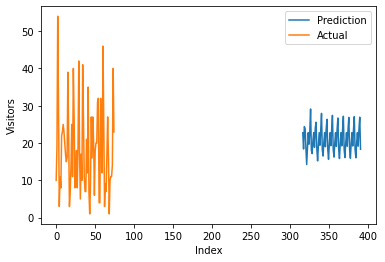

In [94]:
# plot predictions and actual values 
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors") 
actuals.plot(legend = True, label = "Actual")

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The MAPE is 50%
- The RMSLE is 0.75

## **17. Time Series Forecasting - Prophet by Facebook**

In [109]:
# Install 
!pip install prophet

In [111]:
from prophet import Prophet

In [112]:
# Get the train dataset for a air genre, we will use the data till end of Jan 2017 for training
train_selector = df_genre.visit_date < '2017-02-01'
train = df_genre[train_selector]
test_selector = df_genre.visit_date >= '2017-02-01'
test = df_genre[test_selector]

df = train[["visit_date","visitors"]]

# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df.head(10)

,ds,y
0,2016-01-02,60
1,2016-01-03,62
2,2016-01-04,113
3,2016-01-05,90
4,2016-01-06,132
5,2016-01-07,102
6,2016-01-08,174
7,2016-01-09,150
8,2016-01-10,136
9,2016-01-11,83


In [113]:
# Fit the model
model = Prophet()
model.fit(df)
model

09:50:21 - cmdstanpy - INFO - Chain [1] start processing
09:50:21 - cmdstanpy - INFO - Chain [1] done processing


In [114]:
model.changepoints

13    2016-01-15
25    2016-01-27
38    2016-02-09
50    2016-02-21
63    2016-03-05
76    2016-03-18
88    2016-03-30
101   2016-04-12
113   2016-04-24
126   2016-05-07
139   2016-05-20
151   2016-06-01
164   2016-06-14
176   2016-06-26
189   2016-07-09
202   2016-07-22
214   2016-08-03
227   2016-08-16
239   2016-08-28
252   2016-09-10
265   2016-09-23
277   2016-10-05
290   2016-10-18
302   2016-10-30
315   2016-11-12
Name: ds, dtype: datetime64[ns]

In [115]:
# Get the test datset in date time format
future_df = pd.DataFrame({'ds' : test.visit_date})
future_df['ds'] = pd.to_datetime(future_df['ds'])

In [116]:
# Get predictions
forecast = model.predict(future_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
76,2017-04-18,431.132487,326.636201,524.523585
77,2017-04-19,469.558811,377.033430,570.299147
78,2017-04-20,466.031358,376.896359,562.201778
79,2017-04-21,578.883423,488.328093,680.008907
80,2017-04-22,530.075694,442.001036,621.325731


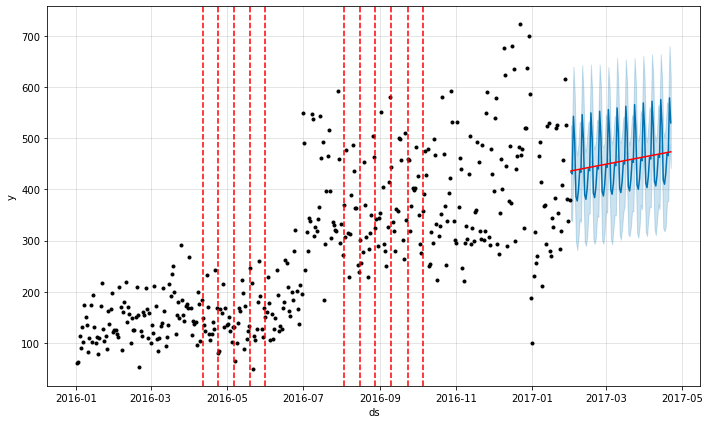

In [117]:
# Python
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

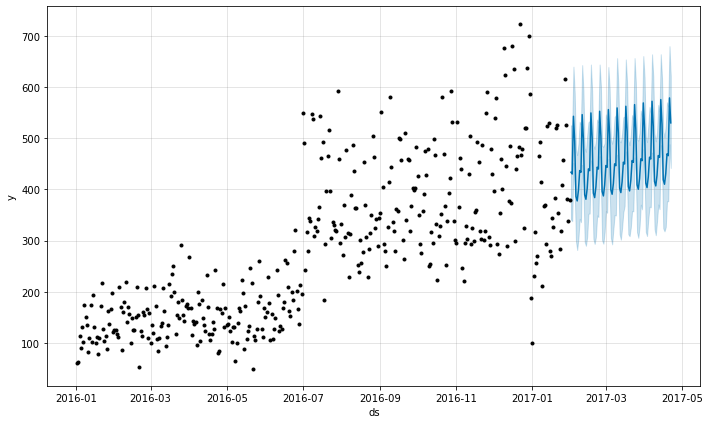

In [118]:
# Visualize the forecast
fig1 = model.plot(forecast)

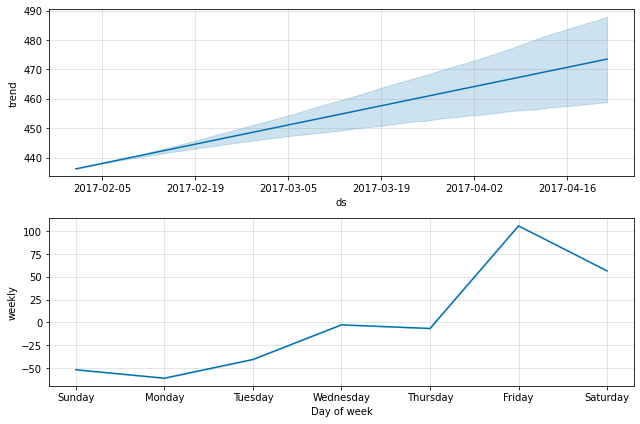

In [119]:
# Visualize the components of forecast
fig2 = model.plot_components(forecast)

### Evaluate

In [120]:
# Evaluation Metric
predictions = forecast['yhat']
actuals = test['visitors'].reset_index(drop = True)
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  64.82665242704931

 RMSLE : 
 0.16447442243596774

 MAPE : 
 13.991754217053021


In [121]:
actuals.index = pd.to_datetime(test.visit_date)
predictions.index = pd.to_datetime(test.visit_date)

<AxesSubplot:xlabel='visit_date', ylabel='Visitors'>

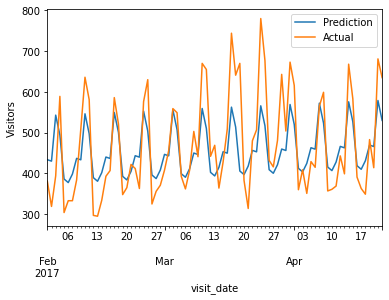

In [122]:
# plot predictions and actual values 
import matplotlib.pyplot as plt
predictions.plot(legend = True, 
                 label = "Prediction", 
                 xlabel = "Index", 
                 ylabel = "Visitors")
 
actuals.plot(legend = True, label = "Actual")

### **Forecast with External Regressors**

In [123]:
# Get the train dataset for a air genre, we will use the data till end of Jan 2017 for training
train_selector = df_genre.visit_date < '2017-02-01'
train = df_genre[train_selector]

test_selector = df_genre.visit_date >= '2017-02-01'
test = df_genre[test_selector]

train.head()

,air_genre_name,visit_date,visitors,holiday_flg,tomorrow_is_holiday,yesterday_is_holiday,weekday,month,day_of_year,days_in_month,week_of_year,is_month_end
0,Yakiniku/Korean food,2016-01-02,60,1,1.0,1.0,5,1,2,31,53,False
1,Yakiniku/Korean food,2016-01-03,62,1,1.0,1.0,6,1,3,31,53,False
2,Yakiniku/Korean food,2016-01-04,113,0,0.0,0.0,0,1,4,31,1,False
3,Yakiniku/Korean food,2016-01-05,90,0,0.0,0.0,1,1,5,31,1,False
4,Yakiniku/Korean food,2016-01-06,132,0,0.0,0.0,2,1,6,31,1,False


In [124]:
# Include the External Regressors in the datasets
df_train = train[["visit_date", "visitors", "holiday_flg", "tomorrow_is_holiday", "yesterday_is_holiday"]]
df_test = test[["visit_date", "visitors", "holiday_flg", "tomorrow_is_holiday", "yesterday_is_holiday"]]


# prepare expected column names
df_train.columns = ['ds', 'y', "holiday_flg", "tomorrow_is_holiday", "yesterday_is_holiday"]
df_test.columns = ['ds', 'y', "holiday_flg", "tomorrow_is_holiday", "yesterday_is_holiday"]

df_train['ds']= pd.to_datetime(df_train['ds'])
df_test['ds']= pd.to_datetime(df_test['ds'])

df_test.head(10)

,ds,y,holiday_flg,tomorrow_is_holiday,yesterday_is_holiday
396,2017-02-01,381,0,0.0,0.0
397,2017-02-02,319,0,0.0,0.0
398,2017-02-03,394,0,0.0,0.0
399,2017-02-04,589,0,1.0,1.0
400,2017-02-05,304,0,1.0,1.0
401,2017-02-06,333,0,0.0,0.0
402,2017-02-07,333,0,0.0,0.0
403,2017-02-08,384,0,0.0,0.0
404,2017-02-09,509,0,0.0,0.0
405,2017-02-10,636,0,0.0,0.0


In [125]:
# Fit the model
model = Prophet()
model.add_regressor("holiday_flg")
model.add_regressor("tomorrow_is_holiday")
model.add_regressor("yesterday_is_holiday")
model.fit(df_train)
model

09:50:37 - cmdstanpy - INFO - Chain [1] start processing
09:50:37 - cmdstanpy - INFO - Chain [1] done processing


In [126]:
model.changepoints

13    2016-01-15
25    2016-01-27
38    2016-02-09
50    2016-02-21
63    2016-03-05
76    2016-03-18
88    2016-03-30
101   2016-04-12
113   2016-04-24
126   2016-05-07
139   2016-05-20
151   2016-06-01
164   2016-06-14
176   2016-06-26
189   2016-07-09
202   2016-07-22
214   2016-08-03
227   2016-08-16
239   2016-08-28
252   2016-09-10
265   2016-09-23
277   2016-10-05
290   2016-10-18
302   2016-10-30
315   2016-11-12
Name: ds, dtype: datetime64[ns]

In [127]:
# Get the test datset in date time format
future_df = df_test.copy()

# future_df = pd.DataFrame({'ds' : test.visit_date})
# future_df['ds'] = pd.to_datetime(future_df['ds'])

In [128]:
# Get predictions
forecast = model.predict(future_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
76,2017-04-18,434.418699,339.152592,538.765253
77,2017-04-19,472.906922,378.412720,571.405478
78,2017-04-20,471.402426,381.086744,564.340575
79,2017-04-21,582.637060,480.789103,673.334273
80,2017-04-22,538.257143,442.293399,624.552149


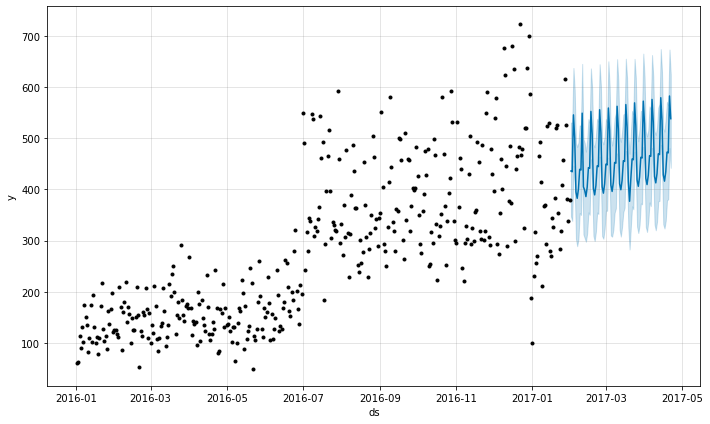

In [129]:
# Visualize the forecast
fig1 = model.plot(forecast)

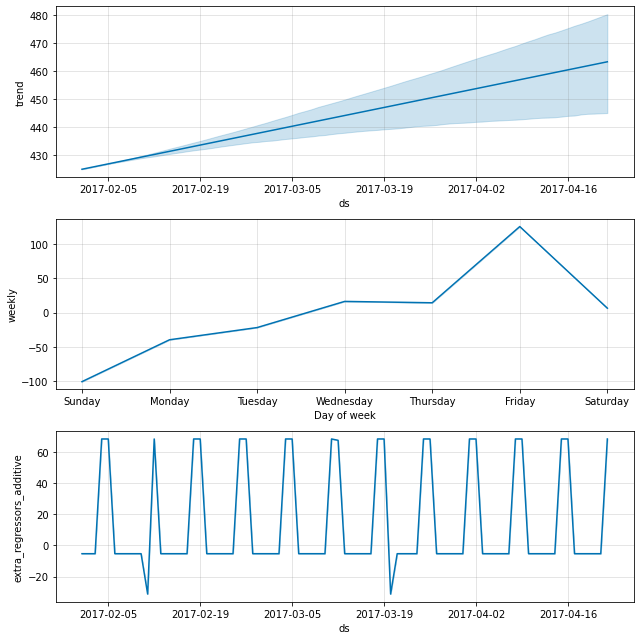

In [130]:
# Visualize the components of forecast
fig2 = model.plot_components(forecast)

### Evaluate

In [131]:
# Evaluation Metric
predictions = forecast['yhat']
actuals = test['visitors'].reset_index(drop = True)
print("\n MAE : \n ", mean_absolute_error(predictions, actuals))
print("\n RMSLE : \n", RMSLE(predictions, actuals))
print("\n MAPE : \n", mean_absolute_percentage_error(predictions, actuals))


 MAE : 
  65.84039544167382

 RMSLE : 
 0.16883210005748056

 MAPE : 
 14.201170257506579


<AxesSubplot:xlabel='Index', ylabel='Visitors'>

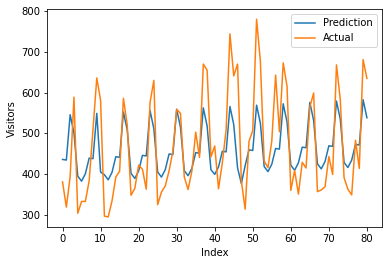

In [132]:
# plot predictions and actual values 
predictions.plot(legend = True, label = "Prediction", xlabel = "Index", ylabel = "Visitors") 
actuals.plot(legend = True, label = "Actual")

### Prediction at restaurant level

In [133]:
# Create a dataframe which contains the visit date and corresponding visitors prediction
prediction_df = pd.DataFrame({'visit_date' : test['visit_date'].reset_index(drop = True),
                              'visitors'   : predictions.reset_index(drop = True)
                              })
prediction_df.head()

,visit_date,visitors
0,2017-02-01,436.016561
1,2017-02-02,434.512064
2,2017-02-03,545.746698
3,2017-02-04,501.366782
4,2017-02-05,395.089229


In [134]:
# Merge the prediction df and store_visitor df 
store_visitor_df['tmp'] = 1
prediction_df['tmp'] = 1

restaurant_prediction_df = pd.merge(prediction_df, store_visitor_df.drop('visitors', axis = 1), on=['tmp'])
restaurant_prediction_df = restaurant_prediction_df.drop('tmp', axis=1)
restaurant_prediction_df.shape

(1863, 4)

In [135]:
# First 50 rows of merged dataframe
restaurant_prediction_df.head(50)

,visit_date,visitors,air_store_id,restaurant_share
0,2017-02-01,436.016561,air_08f994758a1e76d4,0.050737
1,2017-02-01,436.016561,air_1653a6c513865af3,0.093262
2,2017-02-01,436.016561,air_2aab19554f91ff82,0.089099
3,2017-02-01,436.016561,air_2bffb19a24d11729,0.033610
4,2017-02-01,436.016561,air_2fc478dc9f0a6b31,0.019667
5,2017-02-01,436.016561,air_396166d47733d5c9,0.039690
6,2017-02-01,436.016561,air_3f91d592acd6cc0b,0.040856
7,2017-02-01,436.016561,air_42d41eb58cad170e,0.043095
8,2017-02-01,436.016561,air_52e2a1fd42bc917a,0.018333
9,2017-02-01,436.016561,air_5e70fe82f9e4fab6,0.038376


In [136]:
# Split the genre level prediction to restaurant level prediction
restaurant_prediction_df['visitors_predicted'] = restaurant_prediction_df['restaurant_share']*restaurant_prediction_df['visitors']

restaurant_prediction_df.head()

,visit_date,visitors,air_store_id,restaurant_share,visitors_predicted
0,2017-02-01,436.016561,air_08f994758a1e76d4,0.050737,22.122034
1,2017-02-01,436.016561,air_1653a6c513865af3,0.093262,40.663742
2,2017-02-01,436.016561,air_2aab19554f91ff82,0.089099,38.848736
3,2017-02-01,436.016561,air_2bffb19a24d11729,0.033610,14.654496
4,2017-02-01,436.016561,air_2fc478dc9f0a6b31,0.019667,8.575248


In [137]:
# evaluation_df
evaluation_df = pd.merge(restaurant_prediction_df.drop('visitors', axis = 1), restaurant_df_actual, on = ['air_store_id', 'visit_date'])
evaluation_df.head()

,visit_date,air_store_id,restaurant_share,visitors_predicted,visitors
0,2017-02-01,air_08f994758a1e76d4,0.050737,22.122034,34
1,2017-02-01,air_1653a6c513865af3,0.093262,40.663742,19
2,2017-02-01,air_2aab19554f91ff82,0.089099,38.848736,64
3,2017-02-01,air_2bffb19a24d11729,0.033610,14.654496,18
4,2017-02-01,air_396166d47733d5c9,0.039690,17.305399,9


In [138]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n RMSLE : \n", RMSLE(evaluation_df.visitors_predicted, evaluation_df.visitors))
print("\n MAPE : \n", mean_absolute_percentage_error(evaluation_df.visitors_predicted, evaluation_df.visitors))


 MAE : 
  10.283538905767177

 RMSLE : 
 0.6594245005347756

 MAPE : 
 64.26499215940817


### Prediction for submission dataset

In [139]:
# Get the full training data
df = df_genre[["visit_date","visitors"]]

# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2016-01-02,60
1,2016-01-03,62
2,2016-01-04,113
3,2016-01-05,90
4,2016-01-06,132


In [140]:
# Fit the model
model = Prophet()
model.fit(df)
model

09:50:39 - cmdstanpy - INFO - Chain [1] start processing
09:50:39 - cmdstanpy - INFO - Chain [1] done processing


In [141]:
# filter submission dataset
df_submission = df_univariate.loc[df_univariate.dataset == "future",]
df_submission.head()

,dataset,id,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
250468,future,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0,Sunday,0,1,1,1,1,0,6,2017,4,113,30,16,False,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,hpg_fbe603376b5980fc,NaN,NaN,NaN,NaN,Tōkyō-to,Chiyoda-ku,Kudanminami,20,22,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Chiyoda-ku Kudanminami_Italian/French,air_00a91d42b08b08d9_6,air_00a91d42b08b08d9_6_0,2.000000,2.0,2.0,2.0
250469,future,air_0164b9927d20bcc3_2017-04-23,air_0164b9927d20bcc3,2017-04-23,0,Sunday,0,1,1,1,1,0,6,2017,4,113,30,16,False,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Minato-ku,Shibakōen,51,61,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Minato-ku Shibakōen_Italian/French,air_0164b9927d20bcc3_6,air_0164b9927d20bcc3_6_0,NaN,NaN,NaN,NaN
250470,future,air_0241aa3964b7f861_2017-04-23,air_0241aa3964b7f861,2017-04-23,0,Sunday,0,1,1,1,1,0,6,2017,4,113,30,16,False,Izakaya,Tōkyō-to Taitō-ku Higashiueno,35.712607,139.779996,NaN,NaN,NaN,NaN,NaN,Tōkyō-to,Taitō-ku,Higashiueno,16,22,444,NaN,NaN,NaN,NaN,NaN,Tōkyō-to Taitō-ku Higashiueno_Izakaya,air_0241aa3964b7f861_6,air_0241aa3964b7f861_6_0,10.790323,10.0,1.0,26.0
250471,future,air_0328696196e46f18_2017-04-23,air_0328696196e46f18,2017-04-23,0,Sunday,0,1,1,1,1,0,6,2017,4,113,30,16,False,Dining bar,Ōsaka-fu Ōsaka-shi Nakanochō,34.701279,135.528090,NaN,NaN,NaN,NaN,NaN,Ōsaka-fu,Ōsaka-shi,Nakanochō,2,66,74,NaN,NaN,NaN,NaN,NaN,Ōsaka-fu Ōsaka-shi Nakanochō_Dining bar,air_0328696196e46f18_6,air_0328696196e46f18_6_0,10.625000,7.0,1.0,41.0
250472,future,air_034a3d5b40d5b1b1_2017-04-23,air_034a3d5b40d5b1b1,2017-04-23,0,Sunday,0,1,1,1,1,0,6,2017,4,113,30,16,False,Cafe/Sweets,Ōsaka-fu Ōsaka-shi Ōhiraki,34.692337,135.472229,NaN,NaN,NaN,NaN,NaN,Ōsaka-fu,Ōsaka-shi,Ōhiraki,4,66,74,NaN,NaN,NaN,NaN,NaN,Ōsaka-fu Ōsaka-shi Ōhiraki_Cafe/Sweets,air_034a3d5b40d5b1b1_6,air_034a3d5b40d5b1b1_6_0,16.918919,10.0,1.0,64.0


In [142]:
df_submission.visit_date.unique()

array(['2017-04-23', '2017-04-24', '2017-04-25', '2017-04-26',
       '2017-04-27', '2017-04-28', '2017-04-29', '2017-04-30',
       '2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
       '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
       '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
       '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
       '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
       '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
       '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
       '2017-05-29', '2017-05-30', '2017-05-31'], dtype=object)

In [143]:
# Get the test datset in date time format
future_df = pd.DataFrame({'ds' : df_submission.visit_date.unique()})
future_df['ds'] = pd.to_datetime(future_df['ds'])

In [144]:
# Get predictions
forecast = model.predict(future_df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-04-23,436.185686,334.326731,528.461019
1,2017-04-24,425.820463,336.923960,515.605651
2,2017-04-25,443.256079,344.419770,544.753905
3,2017-04-26,488.223811,391.869021,580.029882
4,2017-04-27,483.233731,384.629276,579.479391
5,2017-04-28,610.204436,510.661034,713.466041
6,2017-04-29,565.814697,465.182886,662.147246
7,2017-04-30,440.258094,344.472642,539.432472
8,2017-05-01,429.892871,333.885496,526.391976
9,2017-05-02,447.328488,354.726158,542.984242


## **Machine Learning Models**

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Machine Learning Models</h2>
</div>




## **18. XGB Regressor**

XGBoost is an optimized distributed gradient boosting model designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

`xgboost.XGBRegressor` is the wrappers that prepare the DMatrix and pass in the corresponding objective function and parameters.

In [145]:
from xgboost.sklearn import XGBRegressor

In [194]:
master_df = pd.read_csv("training_df.csv")

# Split the past data and future data
train,future = master_df[master_df['dataset'] == 'past'],master_df[master_df['dataset'] == 'future']
# Drop the dataset and id columns
train = train.drop(['dataset', 'id',],axis=1)
# Get the train dataset, we will use the data till end of Jan 2017
train_selector = train.visit_date < '2017-02-01'
X_train = train[train_selector]
y_train = train[train_selector]['visitors'].apply(np.log1p)    # apply np.log1p() (log(1+x)) to visitors count, to correct for high skewness
# y_train = train[train_selector]['visitors']    # apply np.log1p() (log(1+x)) to visitors count, to correct for high skewness

print('Training dataset dimensions')
print('- X_train:', X_train.shape)
print('- y_train:', y_train.shape)
# Get the test dataset, we will use the data from start of Feb 2017
test_selector = train.visit_date >= '2017-02-01'
X_test = train[test_selector]
y_test = train[test_selector]['visitors'].apply(np.log1p)
# y_test = train[test_selector]['visitors']
print('Testing dataset dimensions')
print('- X_test:', X_test.shape)
print('- y_test:', y_test.shape)

Training dataset dimensions
- X_train: (192785, 44)
- y_train: (192785,)
Testing dataset dimensions
- X_test: (57683, 44)
- y_test: (57683,)


In [191]:
# Define the model
xgbr = XGBRegressor(n_jobs = -1, random_state = 100)

# Train the model
xgbr.fit(X_train.iloc[:,3:], y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=100, ...)

Let's use the model to get predictions on test dataset.

In [195]:
# Prediction
y_pred = xgbr.predict(X_test.iloc[:,3:])
y_pred

array([3.1088638, 1.7257732, 2.0739448, ..., 3.6450605, 3.829138 ,
       2.553386 ], dtype=float32)

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [199]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(y_pred, y_test))
print("\n RMSLE : \n", RMSLE(y_pred, y_test))
print("\n MAPE : \n", mean_absolute_percentage_error(y_pred, y_test))


 MAE : 
  0.3659656218761311

 RMSLE : 
 0.15559551021930254

 MAPE : 
 14.558837621663113


### Feature Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [200]:
# Feature Importance
feature_importance_df = pd.DataFrame({'feature' : X_train.iloc[:,3:].columns, 'importance' : xgbr.feature_importances_ })
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:30,:]
feature_importance_df

,feature,importance
38,median_visitors,0.511958
37,mean_visitors,0.323646
30,reserve_visitors,0.014667
5,yesterday_is_holiday,0.011697
39,min_visitors,0.008138
6,jump_flag,0.007710
3,day_off_flg,0.006216
10,day_of_year,0.005429
28,n_stores_same_Todofuken,0.005324
14,air_genre_name,0.004830


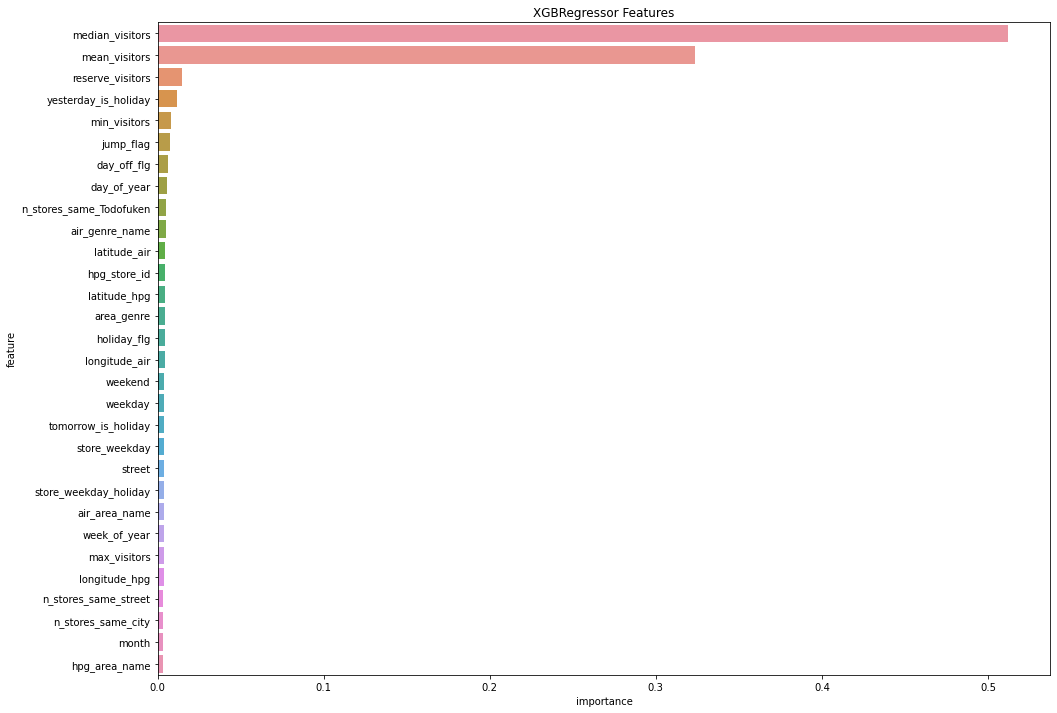

In [201]:
# Plot feature importance
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by="importance", ascending=False));
plt.title('XGBRegressor Features');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- With XGBRegressor, we got RMSLE value of 0.15 and MAPE value of 14%. 
- Only 2 features are dominating the feature importance metric, so this is not a good model. 


Let's look at a XGB model, **not XGBRegressor** 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>XGBoost Demo</h2>
</div>

XGBoost is an optimized distributed gradient boosting model designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.


xgboost.train is the low-level API to train the model via gradient boosting method.

In [202]:
import xgboost as xgb

**Initialize parameters**

In [203]:
# Initialize parameters for XGBoost model
# Ref: https://xgboost.readthedocs.io/en/latest/parameter.html

param = {'colsample_bytree': 0.4,  # range:(0,1] -  subsample ratio of columns when constructing each tree. Default: 1
         'eta': 0.1,               # range: [0, 1] - Learning rate. Default 0.3
         'gamma': 2,               # range: [0, inf] - Minimum loss reduction req to further partition a leaf node. Def: 0
         'max_depth': 4,           # range: [0, inf] - Maximum depth of a tree. default: 6
         'min_child_weight': 100,  # range: [0, inf] - Minimum sum of instance weight needed in a child. Default: 0
         'objective': 'reg:squarederror',  # regression with squred loss
         'seed': 2018,          
         'subsample': 1,           # Subsample ratio of the training instance. Default: 1
         'n_jobs' : -1}            # number of parallel jobs

**Training Data**


In [204]:
X_train.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,599,2016-01-13,25,6,0,0,0,0,0,1,2,0,0,13,31,2,0,4,62,35.658068,139.751599,150,16,31,NaN,NaN,7,29,77,51,61,444,NaN,NaN,NaN,NaN,NaN,143,4195,7817,24.095238,25.0,7.0,57.0
1,104,2016-01-13,21,6,0,0,0,0,0,1,2,0,0,13,31,2,0,7,75,35.626568,139.725858,150,16,31,NaN,NaN,7,43,16,2,7,444,NaN,NaN,NaN,NaN,NaN,178,730,1367,6.760000,4.0,1.0,28.0
2,811,2016-01-13,40,6,0,0,0,0,0,1,2,0,0,13,31,2,0,7,62,35.658068,139.751599,150,16,31,NaN,NaN,7,29,77,51,61,444,NaN,NaN,NaN,NaN,NaN,145,5679,10614,35.272727,37.5,9.0,60.0
3,309,2016-01-13,5,6,0,0,0,0,0,1,2,0,0,13,31,2,0,4,62,35.658068,139.751599,150,16,31,NaN,NaN,7,29,77,51,61,444,NaN,NaN,NaN,NaN,NaN,143,2165,4062,15.938462,15.0,4.0,55.0
4,765,2016-01-13,18,6,0,0,0,0,0,1,2,0,0,13,31,2,0,2,37,34.710895,137.725940,150,16,31,NaN,NaN,6,11,63,13,13,18,NaN,NaN,NaN,NaN,NaN,85,5357,10007,18.084746,18.0,4.0,39.0


**Convert X back to original scale**

In [205]:
# Convert Y back to original scale
y_train_ = y_train.apply(np.exp) - 1
y_test_ = y_test.apply(np.exp) - 1
print(y_train_.head())

0    25.0
1    21.0
2    40.0
3     5.0
4    18.0
Name: visitors, dtype: float64


**Create DMatrix for training**

In [206]:
# Create DMatrix for training and testing dataset
train_dmatrix = xgb.DMatrix(X_train.iloc[:, 2:], label=y_train_)
test_dmatrix = xgb.DMatrix(X_test.iloc[:, 2:], label=y_test_)

# Define the evaluation list
evallist = [(train_dmatrix, 'train'), (test_dmatrix, 'eval')]

**Train the model**

In [209]:
# Train the model
model = xgb.train(params=param,
                  dtrain=train_dmatrix, 
                  num_boost_round=100000, 
                  evals=evallist,
                  early_stopping_rounds=10,
                  verbose_eval=100
                 )

best_iteration = model.best_iteration
best_score = model.best_score

# Print best score and best iteration
print("Best score : ", best_score)
print("Best iteration : ", best_iteration)

[0]	train-rmse:23.59768	eval-rmse:24.59999
[100]	train-rmse:2.42093	eval-rmse:4.18266
[200]	train-rmse:1.98184	eval-rmse:3.86122
[277]	train-rmse:1.84537	eval-rmse:3.76669
Best score :  3.7638764826062197
Best iteration :  268


Let's use the model to get predictions on test dataset.

In [210]:
# Prediction
y_pred = model.predict(test_dmatrix)
y_pred

array([10.89827  ,  5.8453565,  5.2916102, ..., 30.46206  , 36.17142  ,
       21.824638 ], dtype=float32)

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [213]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(y_pred, y_test))
print("\n MAPE : \n", mean_absolute_percentage_error(y_pred, y_test))


 MAE : 
  18.525759626224723

 MAPE : 
 79.41019747975231


#### Feature Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [214]:
# Feature Importance
feature_importance_df             = pd.DataFrame.from_dict(model.get_score(importance_type='gain'), orient='index')
feature_importance_df.columns     = ['importance']
feature_importance_df['feature']  = feature_importance_df.index
feature_importance_df             = feature_importance_df.sort_values(by='importance', ascending=False).head(30)
feature_importance_df

,importance,feature
visitors,288544.187500,visitors
median_visitors,103824.953125,median_visitors
min_visitors,62123.875000,min_visitors
max_visitors,59180.523438,max_visitors
mean_visitors,51078.476562,mean_visitors
yesterday_is_holiday,15320.464844,yesterday_is_holiday
holiday_flg,12976.308594,holiday_flg
reserve_visitors,9282.067383,reserve_visitors
day_of_week,6293.985840,day_of_week
air_genre_name,4866.681641,air_genre_name


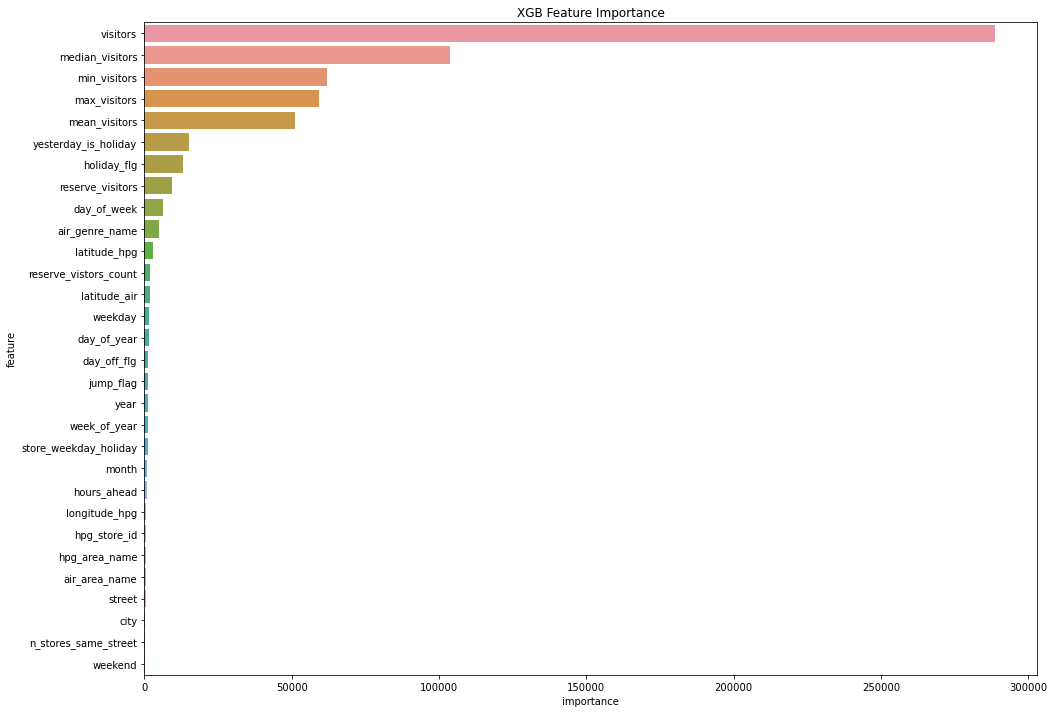

In [215]:
# Plot feature importance
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by="importance", ascending=False));
plt.title('XGB Feature Importance');

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- With XGB, we got RMSLE value of 0.56 and MAPE value of 17.61% which is almost similar to XGBRegressor 
- 4-5 features are contributing in predicting the y variable, it's better than XGBRegressor but not upto the mark


Let's look at a CatBoost model to see if the performance can be improved

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>CatBoost Demo</h2>
</div>

CatBoost is a high-performance open source library for gradient boosting on decision trees 

Features of CatBoost:

- Great Quality without parameter tuning
- Categorical feature support
- Fast and scalable GPU version
- Improved accuracy
- Fast prediction

In [216]:
# !pip install catboost

In [217]:
from catboost import CatBoostRegressor

In [218]:
X_train.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,599,2016-01-13,25,6,0,0,0,0,0,1,2,0,0,13,31,2,0,4,62,35.658068,139.751599,150,16,31,NaN,NaN,7,29,77,51,61,444,NaN,NaN,NaN,NaN,NaN,143,4195,7817,24.095238,25.0,7.0,57.0
1,104,2016-01-13,21,6,0,0,0,0,0,1,2,0,0,13,31,2,0,7,75,35.626568,139.725858,150,16,31,NaN,NaN,7,43,16,2,7,444,NaN,NaN,NaN,NaN,NaN,178,730,1367,6.760000,4.0,1.0,28.0
2,811,2016-01-13,40,6,0,0,0,0,0,1,2,0,0,13,31,2,0,7,62,35.658068,139.751599,150,16,31,NaN,NaN,7,29,77,51,61,444,NaN,NaN,NaN,NaN,NaN,145,5679,10614,35.272727,37.5,9.0,60.0
3,309,2016-01-13,5,6,0,0,0,0,0,1,2,0,0,13,31,2,0,4,62,35.658068,139.751599,150,16,31,NaN,NaN,7,29,77,51,61,444,NaN,NaN,NaN,NaN,NaN,143,2165,4062,15.938462,15.0,4.0,55.0
4,765,2016-01-13,18,6,0,0,0,0,0,1,2,0,0,13,31,2,0,2,37,34.710895,137.725940,150,16,31,NaN,NaN,6,11,63,13,13,18,NaN,NaN,NaN,NaN,NaN,85,5357,10007,18.084746,18.0,4.0,39.0


**Transform Y back to original scale**

In [219]:
# Convert Y back to original scale
y_train_ = y_train.apply(np.exp) - 1
y_test_ = y_test.apply(np.exp) - 1
print(y_train_.head())

0    25.0
1    21.0
2    40.0
3     5.0
4    18.0
Name: visitors, dtype: float64


**Train the model**

In [220]:
# Define the model 
catboost_regressor = CatBoostRegressor(random_state = 100,
                                       loss_function='RMSE'  # default
                                       )

# Train the model
catboost_regressor.fit(X=X_train.iloc[:, 2:], 
                       y=y_train_,
                       plot=True,
                       # eval_set = (X_test.iloc[:,2:], y_test_)
                       )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.09402
0:	learn: 15.0707099	total: 207ms	remaining: 3m 26s
1:	learn: 13.7720216	total: 244ms	remaining: 2m 1s
2:	learn: 12.5963054	total: 280ms	remaining: 1m 33s
3:	learn: 11.5101378	total: 316ms	remaining: 1m 18s
4:	learn: 10.5295011	total: 351ms	remaining: 1m 9s
5:	learn: 9.6391785	total: 383ms	remaining: 1m 3s
6:	learn: 8.8255108	total: 418ms	remaining: 59.3s
7:	learn: 8.0862352	total: 451ms	remaining: 55.9s
8:	learn: 7.4151203	total: 484ms	remaining: 53.3s
9:	learn: 6.7970464	total: 520ms	remaining: 51.5s
10:	learn: 6.2418488	total: 561ms	remaining: 50.4s
11:	learn: 5.7333723	total: 599ms	remaining: 49.3s
12:	learn: 5.2656582	total: 636ms	remaining: 48.3s
13:	learn: 4.8407338	total: 672ms	remaining: 47.3s
14:	learn: 4.4544583	total: 709ms	remaining: 46.6s
15:	learn: 4.0998931	total: 749ms	remaining: 46s
16:	learn: 3.7735499	total: 819ms	remaining: 47.3s
17:	learn: 3.4741518	total: 870ms	remaining: 47.5s
18:	learn: 3.2072661	total: 917ms	remaining: 47.3s
19:	le

169:	learn: 0.2309816	total: 4.12s	remaining: 20.1s
170:	learn: 0.2299235	total: 4.14s	remaining: 20.1s
171:	learn: 0.2283233	total: 4.16s	remaining: 20s
172:	learn: 0.2278480	total: 4.18s	remaining: 20s
173:	learn: 0.2256473	total: 4.2s	remaining: 19.9s
174:	learn: 0.2253191	total: 4.22s	remaining: 19.9s
175:	learn: 0.2230916	total: 4.24s	remaining: 19.8s
176:	learn: 0.2226436	total: 4.26s	remaining: 19.8s
177:	learn: 0.2214129	total: 4.28s	remaining: 19.8s
178:	learn: 0.2209449	total: 4.3s	remaining: 19.7s
179:	learn: 0.2204717	total: 4.31s	remaining: 19.6s
180:	learn: 0.2196665	total: 4.34s	remaining: 19.6s
181:	learn: 0.2172531	total: 4.36s	remaining: 19.6s
182:	learn: 0.2170058	total: 4.39s	remaining: 19.6s
183:	learn: 0.2165965	total: 4.41s	remaining: 19.6s
184:	learn: 0.2136990	total: 4.43s	remaining: 19.5s
185:	learn: 0.2133182	total: 4.45s	remaining: 19.5s
186:	learn: 0.2122911	total: 4.47s	remaining: 19.4s
187:	learn: 0.2120765	total: 4.49s	remaining: 19.4s
188:	learn: 0.2117

330:	learn: 0.1018421	total: 7.38s	remaining: 14.9s
331:	learn: 0.1014723	total: 7.41s	remaining: 14.9s
332:	learn: 0.1013534	total: 7.42s	remaining: 14.9s
333:	learn: 0.1011763	total: 7.44s	remaining: 14.8s
334:	learn: 0.1003553	total: 7.46s	remaining: 14.8s
335:	learn: 0.0998815	total: 7.49s	remaining: 14.8s
336:	learn: 0.0997569	total: 7.5s	remaining: 14.8s
337:	learn: 0.0994309	total: 7.52s	remaining: 14.7s
338:	learn: 0.0989099	total: 7.54s	remaining: 14.7s
339:	learn: 0.0985827	total: 7.55s	remaining: 14.7s
340:	learn: 0.0984885	total: 7.57s	remaining: 14.6s
341:	learn: 0.0980308	total: 7.59s	remaining: 14.6s
342:	learn: 0.0972598	total: 7.62s	remaining: 14.6s
343:	learn: 0.0963797	total: 7.63s	remaining: 14.6s
344:	learn: 0.0960792	total: 7.65s	remaining: 14.5s
345:	learn: 0.0959898	total: 7.67s	remaining: 14.5s
346:	learn: 0.0952296	total: 7.69s	remaining: 14.5s
347:	learn: 0.0947840	total: 7.71s	remaining: 14.4s
348:	learn: 0.0944494	total: 7.73s	remaining: 14.4s
349:	learn: 0

499:	learn: 0.0529844	total: 10.8s	remaining: 10.8s
500:	learn: 0.0528038	total: 10.8s	remaining: 10.7s
501:	learn: 0.0525376	total: 10.8s	remaining: 10.7s
502:	learn: 0.0524615	total: 10.8s	remaining: 10.7s
503:	learn: 0.0521680	total: 10.9s	remaining: 10.7s
504:	learn: 0.0520086	total: 10.9s	remaining: 10.7s
505:	learn: 0.0516222	total: 10.9s	remaining: 10.6s
506:	learn: 0.0513880	total: 10.9s	remaining: 10.6s
507:	learn: 0.0511194	total: 10.9s	remaining: 10.6s
508:	learn: 0.0510160	total: 11s	remaining: 10.6s
509:	learn: 0.0508019	total: 11s	remaining: 10.6s
510:	learn: 0.0504777	total: 11s	remaining: 10.5s
511:	learn: 0.0502819	total: 11s	remaining: 10.5s
512:	learn: 0.0501400	total: 11.1s	remaining: 10.5s
513:	learn: 0.0499852	total: 11.1s	remaining: 10.5s
514:	learn: 0.0497866	total: 11.1s	remaining: 10.4s
515:	learn: 0.0495510	total: 11.1s	remaining: 10.4s
516:	learn: 0.0493861	total: 11.1s	remaining: 10.4s
517:	learn: 0.0492713	total: 11.1s	remaining: 10.4s
518:	learn: 0.049145

662:	learn: 0.0311485	total: 13.7s	remaining: 6.99s
663:	learn: 0.0310926	total: 13.8s	remaining: 6.97s
664:	learn: 0.0310653	total: 13.8s	remaining: 6.94s
665:	learn: 0.0310240	total: 13.8s	remaining: 6.92s
666:	learn: 0.0308730	total: 13.8s	remaining: 6.9s
667:	learn: 0.0308063	total: 13.8s	remaining: 6.88s
668:	learn: 0.0306492	total: 13.9s	remaining: 6.86s
669:	learn: 0.0305240	total: 13.9s	remaining: 6.84s
670:	learn: 0.0304592	total: 13.9s	remaining: 6.82s
671:	learn: 0.0302945	total: 13.9s	remaining: 6.8s
672:	learn: 0.0302003	total: 14s	remaining: 6.78s
673:	learn: 0.0300723	total: 14s	remaining: 6.76s
674:	learn: 0.0299800	total: 14s	remaining: 6.74s
675:	learn: 0.0298458	total: 14s	remaining: 6.71s
676:	learn: 0.0297814	total: 14s	remaining: 6.69s
677:	learn: 0.0297048	total: 14s	remaining: 6.67s
678:	learn: 0.0296136	total: 14.1s	remaining: 6.65s
679:	learn: 0.0295598	total: 14.1s	remaining: 6.63s
680:	learn: 0.0294955	total: 14.1s	remaining: 6.6s
681:	learn: 0.0294322	total

824:	learn: 0.0193359	total: 16.8s	remaining: 3.56s
825:	learn: 0.0192457	total: 16.8s	remaining: 3.54s
826:	learn: 0.0192147	total: 16.8s	remaining: 3.51s
827:	learn: 0.0191502	total: 16.8s	remaining: 3.49s
828:	learn: 0.0190708	total: 16.8s	remaining: 3.47s
829:	learn: 0.0190215	total: 16.8s	remaining: 3.45s
830:	learn: 0.0189500	total: 16.9s	remaining: 3.43s
831:	learn: 0.0189032	total: 16.9s	remaining: 3.41s
832:	learn: 0.0188407	total: 16.9s	remaining: 3.39s
833:	learn: 0.0187798	total: 16.9s	remaining: 3.37s
834:	learn: 0.0187241	total: 17s	remaining: 3.35s
835:	learn: 0.0186922	total: 17s	remaining: 3.33s
836:	learn: 0.0186289	total: 17s	remaining: 3.31s
837:	learn: 0.0185865	total: 17s	remaining: 3.29s
838:	learn: 0.0185594	total: 17s	remaining: 3.27s
839:	learn: 0.0185243	total: 17s	remaining: 3.25s
840:	learn: 0.0184491	total: 17.1s	remaining: 3.23s
841:	learn: 0.0184265	total: 17.1s	remaining: 3.21s
842:	learn: 0.0183608	total: 17.1s	remaining: 3.19s
843:	learn: 0.0183438	to

994:	learn: 0.0127606	total: 20s	remaining: 101ms
995:	learn: 0.0127257	total: 20.1s	remaining: 80.5ms
996:	learn: 0.0126982	total: 20.1s	remaining: 60.4ms
997:	learn: 0.0126787	total: 20.1s	remaining: 40.2ms
998:	learn: 0.0126478	total: 20.1s	remaining: 20.1ms
999:	learn: 0.0126349	total: 20.1s	remaining: 0us


Let's use the model to get predictions on test dataset.

In [221]:
# Prediction
y_pred = catboost_regressor.predict(X_test.iloc[:,2:])
y_pred

array([10.00202989,  6.00188875,  4.99339545, ..., 29.99898577,
       35.99792192, 21.9915174 ])

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [222]:
# Replace negative values with 1
y_pred = np.where(y_pred < 0, 1, y_pred)

# check  number of replacements
np.sum(y_pred == 1)

0

In [223]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(y_pred, y_test_))
print("\n RMSLE : \n", RMSLE(y_pred, y_test_))
print("\n MAPE : \n", mean_absolute_percentage_error(y_pred, y_test_))


 MAE : 
  0.014834656419105476

 RMSLE : 
 0.0019399635168075209

 MAPE : 
 0.04060321272906565


#### Feature Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [224]:
# Feature Importance
feature_importance_df = pd.DataFrame({'feature' : X_train.iloc[:,2:].columns, 'importance' : catboost_regressor.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:30,:]
feature_importance_df

,feature,importance
0,visitors,98.339568
41,max_visitors,1.652509
27,n_stores_same_street,0.000699
26,street,0.000677
13,week_of_year,0.000650
39,median_visitors,0.000646
17,latitude_air,0.000503
34,hours_ahead,0.000488
16,air_area_name,0.000468
37,store_weekday_holiday,0.000455


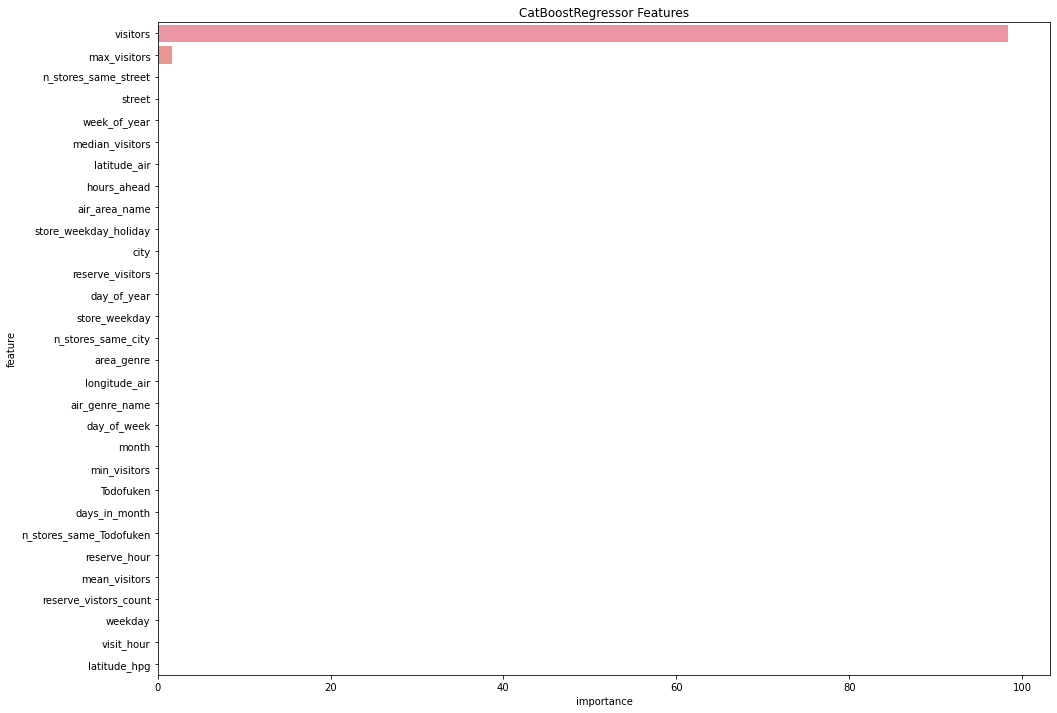

In [225]:
# Plot feature importance
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by="importance", ascending=False));
plt.title('CatBoostRegressor Features');

**Feature statistics for mean_visitors**

In [226]:
catboost_regressor.calc_feature_statistics(data=X_train.iloc[:, 2:],
                                           target=y_train_,
                                           feature='mean_visitors',
                                           plot=True,
                                           plot_file="mean_visitors.html")

{'borders': array([12.324265, 14.029858, 25.289898, 25.495903, 27.1875  , 35.389565,
        37.131943, 37.41795 , 37.787453, 38.982143, 39.315315, 43.871796,
        45.316986, 50.928688], dtype=float32),
 'binarized_feature': array([ 2,  0,  5, ...,  0,  2, 13]),
 'mean_target': array([ 8.437987, 13.090989, 19.222692, 25.124302, 26.168669, 30.908443,
        36.12916 , 37.607143, 37.66265 , 38.48602 , 38.786083, 41.488228,
        44.057163, 47.495403, 58.305157], dtype=float32),
 'mean_weighted_target': array([], dtype=float32),
 'mean_prediction': array([ 8.437794, 13.090513, 19.222761, 25.12518 , 26.169512, 30.908676,
        36.129364, 37.60762 , 37.662334, 38.486786, 38.785778, 41.488274,
        44.05715 , 47.495403, 58.305832], dtype=float32),
 'objects_per_bin': array([58714, 11309, 63958,   716,  6824, 24881,  3724,   756,   747,
         2253,   776,  6796,  1487,  4568,  5276], dtype=uint32),
 'predictions_on_varying_feature': array([20.84496698, 20.84496419, 20.84456142, 

**Feature statistics for day_of_week**

In [227]:
catboost_regressor.calc_feature_statistics(data=X_train.iloc[:, 2:],
                                           target=y_train_,
                                           feature='day_of_year',
                                           plot=True,
                                           plot_file="day_of_year.html");

**Feature Statistics for Week of year**

In [228]:
catboost_regressor.calc_feature_statistics(data=X_train.iloc[:, 2:],
                                           target=y_train_,
                                           feature='week_of_year',
                                           plot=True,
                                           plot_file="week_of_year.html");

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

**Train the model with categorical values specified**

In [229]:
X_train.head()

,air_store_id,visit_date,visitors,day_of_week,holiday_flg,weekend,day_off_flg,tomorrow_is_holiday,yesterday_is_holiday,jump_flag,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg,Todofuken,city,street,n_stores_same_street,n_stores_same_city,n_stores_same_Todofuken,reserve_vistors_count,reserve_visitors,visit_hour,reserve_hour,hours_ahead,area_genre,store_weekday,store_weekday_holiday,mean_visitors,median_visitors,min_visitors,max_visitors
0,599,2016-01-13,25,6,0,0,0,0,0,1,2,0,0,13,31,2,0,4,62,35.658068,139.751599,150,16,31,NaN,NaN,7,29,77,51,61,444,NaN,NaN,NaN,NaN,NaN,143,4195,7817,24.095238,25.0,7.0,57.0
1,104,2016-01-13,21,6,0,0,0,0,0,1,2,0,0,13,31,2,0,7,75,35.626568,139.725858,150,16,31,NaN,NaN,7,43,16,2,7,444,NaN,NaN,NaN,NaN,NaN,178,730,1367,6.760000,4.0,1.0,28.0
2,811,2016-01-13,40,6,0,0,0,0,0,1,2,0,0,13,31,2,0,7,62,35.658068,139.751599,150,16,31,NaN,NaN,7,29,77,51,61,444,NaN,NaN,NaN,NaN,NaN,145,5679,10614,35.272727,37.5,9.0,60.0
3,309,2016-01-13,5,6,0,0,0,0,0,1,2,0,0,13,31,2,0,4,62,35.658068,139.751599,150,16,31,NaN,NaN,7,29,77,51,61,444,NaN,NaN,NaN,NaN,NaN,143,2165,4062,15.938462,15.0,4.0,55.0
4,765,2016-01-13,18,6,0,0,0,0,0,1,2,0,0,13,31,2,0,2,37,34.710895,137.725940,150,16,31,NaN,NaN,6,11,63,13,13,18,NaN,NaN,NaN,NaN,NaN,85,5357,10007,18.084746,18.0,4.0,39.0


In [230]:
cat_columns = ['day_of_week', 'holiday_flg', 'weekend', 
              'day_off_flg',	'tomorrow_is_holiday',
              'yesterday_is_holiday',	'jump_flag',
              'weekday',	'year',	'month',	'day_of_year',
              'days_in_month',	'week_of_year',	'is_month_end']
              # 'air_genre_name',	'air_area_name',
              # 'hpg_store_id',	'hpg_genre_name',
              # 'hpg_area_name',	'Todofuken',	'city',
              # 'street',	'visit_hour',	'reserve_hour',
              # 'area_genre',	'store_weekday',	'store_weekday_holiday']

In [231]:
# Convert Categorical columns to int64 in training data
X_train_ = X_train.copy()
X_train_.fillna(0, inplace=True)
X_train_[cat_columns] = X_train_[cat_columns].astype(np.str)

In [232]:
# Convert Categorical columns to int64 in test data
X_test_ = X_test.copy()
X_test_.fillna(0, inplace=True)
X_test_[cat_columns] = X_test_[cat_columns].astype(np.str)

In [233]:
X_train_.dtypes

air_store_id                 int64
visit_date                  object
visitors                     int64
day_of_week                 object
holiday_flg                 object
weekend                     object
day_off_flg                 object
tomorrow_is_holiday         object
yesterday_is_holiday        object
jump_flag                   object
weekday                     object
year                        object
month                       object
day_of_year                 object
days_in_month               object
week_of_year                object
is_month_end                object
air_genre_name               int64
air_area_name                int64
latitude_air               float64
longitude_air              float64
hpg_store_id                 int64
hpg_genre_name               int64
hpg_area_name                int64
latitude_hpg               float64
longitude_hpg              float64
Todofuken                    int64
city                         int64
street              

In [234]:
# Define the model: 
# 1. Change Loss function 
# 2. explicit categorical columns
# 3. Increase number of iterations

catboost_regressor = CatBoostRegressor(random_state = 100,
                                       # loss_function='MAPE',  # default=RMSE
                                       # cat_features = cat_columns,
                                       iterations=1500
                                       )

# Train the model
catboost_regressor.fit(X=X_train_.iloc[:,2:], 
                       y=y_train_,
                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.067617
0:	learn: 15.4669200	total: 33.8ms	remaining: 50.7s
1:	learn: 14.5065267	total: 52.1ms	remaining: 39s
2:	learn: 13.6123709	total: 71.1ms	remaining: 35.5s
3:	learn: 12.7646324	total: 89.3ms	remaining: 33.4s
4:	learn: 11.9767334	total: 109ms	remaining: 32.6s
5:	learn: 11.2492033	total: 127ms	remaining: 31.6s
6:	learn: 10.5614145	total: 145ms	remaining: 31s
7:	learn: 9.9237046	total: 164ms	remaining: 30.5s
8:	learn: 9.3232491	total: 185ms	remaining: 30.6s
9:	learn: 8.7531945	total: 206ms	remaining: 30.6s
10:	learn: 8.2294061	total: 230ms	remaining: 31.1s
11:	learn: 7.7365049	total: 251ms	remaining: 31.2s
12:	learn: 7.2759863	total: 272ms	remaining: 31.1s
13:	learn: 6.8328506	total: 292ms	remaining: 31s
14:	learn: 6.4322807	total: 316ms	remaining: 31.3s
15:	learn: 6.0491227	total: 338ms	remaining: 31.3s
16:	learn: 5.6891873	total: 356ms	remaining: 31.1s
17:	learn: 5.3563088	total: 377ms	remaining: 31s
18:	learn: 5.0426590	total: 397ms	remaining: 31s
19:	learn:

162:	learn: 0.2252630	total: 2.98s	remaining: 24.4s
163:	learn: 0.2250125	total: 2.99s	remaining: 24.3s
164:	learn: 0.2247702	total: 3s	remaining: 24.3s
165:	learn: 0.2240567	total: 3.02s	remaining: 24.3s
166:	learn: 0.2238294	total: 3.03s	remaining: 24.2s
167:	learn: 0.2236092	total: 3.04s	remaining: 24.1s
168:	learn: 0.2221513	total: 3.06s	remaining: 24.1s
169:	learn: 0.2219273	total: 3.07s	remaining: 24s
170:	learn: 0.2216786	total: 3.09s	remaining: 24s
171:	learn: 0.2203815	total: 3.1s	remaining: 24s
172:	learn: 0.2201936	total: 3.12s	remaining: 23.9s
173:	learn: 0.2182686	total: 3.13s	remaining: 23.9s
174:	learn: 0.2171717	total: 3.15s	remaining: 23.9s
175:	learn: 0.2161814	total: 3.17s	remaining: 23.9s
176:	learn: 0.2160214	total: 3.18s	remaining: 23.8s
177:	learn: 0.2158425	total: 3.2s	remaining: 23.8s
178:	learn: 0.2154449	total: 3.22s	remaining: 23.7s
179:	learn: 0.2152053	total: 3.24s	remaining: 23.7s
180:	learn: 0.2150484	total: 3.25s	remaining: 23.7s
181:	learn: 0.2133653	t

328:	learn: 0.1252697	total: 6s	remaining: 21.4s
329:	learn: 0.1247329	total: 6.03s	remaining: 21.4s
330:	learn: 0.1242972	total: 6.04s	remaining: 21.3s
331:	learn: 0.1231508	total: 6.06s	remaining: 21.3s
332:	learn: 0.1223640	total: 6.08s	remaining: 21.3s
333:	learn: 0.1217431	total: 6.1s	remaining: 21.3s
334:	learn: 0.1207181	total: 6.13s	remaining: 21.3s
335:	learn: 0.1200894	total: 6.16s	remaining: 21.3s
336:	learn: 0.1198328	total: 6.21s	remaining: 21.4s
337:	learn: 0.1197327	total: 6.22s	remaining: 21.4s
338:	learn: 0.1190074	total: 6.24s	remaining: 21.4s
339:	learn: 0.1185704	total: 6.26s	remaining: 21.4s
340:	learn: 0.1176562	total: 6.28s	remaining: 21.4s
341:	learn: 0.1170960	total: 6.31s	remaining: 21.4s
342:	learn: 0.1169900	total: 6.32s	remaining: 21.3s
343:	learn: 0.1165963	total: 6.33s	remaining: 21.3s
344:	learn: 0.1157885	total: 6.36s	remaining: 21.3s
345:	learn: 0.1153556	total: 6.38s	remaining: 21.3s
346:	learn: 0.1152161	total: 6.4s	remaining: 21.3s
347:	learn: 0.115

495:	learn: 0.0737990	total: 9.23s	remaining: 18.7s
496:	learn: 0.0736478	total: 9.24s	remaining: 18.7s
497:	learn: 0.0736372	total: 9.26s	remaining: 18.6s
498:	learn: 0.0734888	total: 9.28s	remaining: 18.6s
499:	learn: 0.0734343	total: 9.29s	remaining: 18.6s
500:	learn: 0.0732347	total: 9.31s	remaining: 18.6s
501:	learn: 0.0732250	total: 9.32s	remaining: 18.5s
502:	learn: 0.0730743	total: 9.34s	remaining: 18.5s
503:	learn: 0.0726012	total: 9.36s	remaining: 18.5s
504:	learn: 0.0725921	total: 9.38s	remaining: 18.5s
505:	learn: 0.0725834	total: 9.39s	remaining: 18.4s
506:	learn: 0.0722784	total: 9.41s	remaining: 18.4s
507:	learn: 0.0720106	total: 9.43s	remaining: 18.4s
508:	learn: 0.0718760	total: 9.45s	remaining: 18.4s
509:	learn: 0.0716263	total: 9.46s	remaining: 18.4s
510:	learn: 0.0713730	total: 9.47s	remaining: 18.3s
511:	learn: 0.0712446	total: 9.49s	remaining: 18.3s
512:	learn: 0.0711065	total: 9.51s	remaining: 18.3s
513:	learn: 0.0710426	total: 9.53s	remaining: 18.3s
514:	learn: 

662:	learn: 0.0486262	total: 12.2s	remaining: 15.4s
663:	learn: 0.0484782	total: 12.2s	remaining: 15.4s
664:	learn: 0.0484523	total: 12.3s	remaining: 15.4s
665:	learn: 0.0482792	total: 12.3s	remaining: 15.4s
666:	learn: 0.0482240	total: 12.3s	remaining: 15.4s
667:	learn: 0.0481137	total: 12.3s	remaining: 15.3s
668:	learn: 0.0480284	total: 12.3s	remaining: 15.3s
669:	learn: 0.0477865	total: 12.3s	remaining: 15.3s
670:	learn: 0.0475832	total: 12.4s	remaining: 15.3s
671:	learn: 0.0474029	total: 12.4s	remaining: 15.3s
672:	learn: 0.0472386	total: 12.4s	remaining: 15.2s
673:	learn: 0.0471987	total: 12.4s	remaining: 15.2s
674:	learn: 0.0471472	total: 12.4s	remaining: 15.2s
675:	learn: 0.0471055	total: 12.5s	remaining: 15.2s
676:	learn: 0.0470281	total: 12.5s	remaining: 15.2s
677:	learn: 0.0468876	total: 12.5s	remaining: 15.1s
678:	learn: 0.0468419	total: 12.5s	remaining: 15.1s
679:	learn: 0.0467989	total: 12.5s	remaining: 15.1s
680:	learn: 0.0467963	total: 12.5s	remaining: 15.1s
681:	learn: 

831:	learn: 0.0325658	total: 15.2s	remaining: 12.2s
832:	learn: 0.0325367	total: 15.3s	remaining: 12.2s
833:	learn: 0.0324523	total: 15.3s	remaining: 12.2s
834:	learn: 0.0324341	total: 15.3s	remaining: 12.2s
835:	learn: 0.0324200	total: 15.3s	remaining: 12.2s
836:	learn: 0.0323486	total: 15.3s	remaining: 12.1s
837:	learn: 0.0323366	total: 15.3s	remaining: 12.1s
838:	learn: 0.0322568	total: 15.4s	remaining: 12.1s
839:	learn: 0.0322119	total: 15.4s	remaining: 12.1s
840:	learn: 0.0321117	total: 15.4s	remaining: 12.1s
841:	learn: 0.0320430	total: 15.4s	remaining: 12.1s
842:	learn: 0.0319286	total: 15.4s	remaining: 12s
843:	learn: 0.0318334	total: 15.5s	remaining: 12s
844:	learn: 0.0317645	total: 15.5s	remaining: 12s
845:	learn: 0.0316835	total: 15.5s	remaining: 12s
846:	learn: 0.0316420	total: 15.5s	remaining: 12s
847:	learn: 0.0315849	total: 15.5s	remaining: 12s
848:	learn: 0.0315156	total: 15.6s	remaining: 11.9s
849:	learn: 0.0314266	total: 15.6s	remaining: 11.9s
850:	learn: 0.0313607	to

991:	learn: 0.0228037	total: 18.3s	remaining: 9.36s
992:	learn: 0.0227722	total: 18.3s	remaining: 9.34s
993:	learn: 0.0227194	total: 18.3s	remaining: 9.31s
994:	learn: 0.0226880	total: 18.3s	remaining: 9.3s
995:	learn: 0.0226463	total: 18.3s	remaining: 9.28s
996:	learn: 0.0226194	total: 18.4s	remaining: 9.26s
997:	learn: 0.0225707	total: 18.4s	remaining: 9.24s
998:	learn: 0.0225326	total: 18.4s	remaining: 9.22s
999:	learn: 0.0224811	total: 18.4s	remaining: 9.2s
1000:	learn: 0.0224582	total: 18.4s	remaining: 9.18s
1001:	learn: 0.0224507	total: 18.4s	remaining: 9.16s
1002:	learn: 0.0224134	total: 18.5s	remaining: 9.15s
1003:	learn: 0.0223786	total: 18.5s	remaining: 9.13s
1004:	learn: 0.0223140	total: 18.5s	remaining: 9.12s
1005:	learn: 0.0223072	total: 18.5s	remaining: 9.1s
1006:	learn: 0.0222515	total: 18.5s	remaining: 9.08s
1007:	learn: 0.0222181	total: 18.6s	remaining: 9.06s
1008:	learn: 0.0221889	total: 18.6s	remaining: 9.04s
1009:	learn: 0.0221674	total: 18.6s	remaining: 9.02s
1010:

1149:	learn: 0.0168778	total: 21.3s	remaining: 6.47s
1150:	learn: 0.0168548	total: 21.3s	remaining: 6.46s
1151:	learn: 0.0168262	total: 21.3s	remaining: 6.44s
1152:	learn: 0.0168128	total: 21.3s	remaining: 6.42s
1153:	learn: 0.0168022	total: 21.3s	remaining: 6.4s
1154:	learn: 0.0167632	total: 21.4s	remaining: 6.38s
1155:	learn: 0.0167175	total: 21.4s	remaining: 6.37s
1156:	learn: 0.0167115	total: 21.4s	remaining: 6.35s
1157:	learn: 0.0166743	total: 21.4s	remaining: 6.33s
1158:	learn: 0.0166584	total: 21.4s	remaining: 6.31s
1159:	learn: 0.0166281	total: 21.5s	remaining: 6.29s
1160:	learn: 0.0166209	total: 21.5s	remaining: 6.27s
1161:	learn: 0.0165366	total: 21.5s	remaining: 6.25s
1162:	learn: 0.0164824	total: 21.5s	remaining: 6.23s
1163:	learn: 0.0164732	total: 21.5s	remaining: 6.22s
1164:	learn: 0.0164254	total: 21.6s	remaining: 6.2s
1165:	learn: 0.0164170	total: 21.6s	remaining: 6.18s
1166:	learn: 0.0164116	total: 21.6s	remaining: 6.16s
1167:	learn: 0.0163374	total: 21.6s	remaining: 6

1310:	learn: 0.0124642	total: 24.3s	remaining: 3.5s
1311:	learn: 0.0124392	total: 24.3s	remaining: 3.48s
1312:	learn: 0.0124270	total: 24.3s	remaining: 3.46s
1313:	learn: 0.0124013	total: 24.3s	remaining: 3.44s
1314:	learn: 0.0123993	total: 24.4s	remaining: 3.43s
1315:	learn: 0.0123754	total: 24.4s	remaining: 3.41s
1316:	learn: 0.0123581	total: 24.4s	remaining: 3.39s
1317:	learn: 0.0123352	total: 24.4s	remaining: 3.37s
1318:	learn: 0.0123007	total: 24.4s	remaining: 3.35s
1319:	learn: 0.0122673	total: 24.4s	remaining: 3.33s
1320:	learn: 0.0122430	total: 24.5s	remaining: 3.31s
1321:	learn: 0.0122401	total: 24.5s	remaining: 3.29s
1322:	learn: 0.0122297	total: 24.5s	remaining: 3.28s
1323:	learn: 0.0122032	total: 24.5s	remaining: 3.26s
1324:	learn: 0.0121725	total: 24.5s	remaining: 3.24s
1325:	learn: 0.0121474	total: 24.5s	remaining: 3.22s
1326:	learn: 0.0121309	total: 24.6s	remaining: 3.2s
1327:	learn: 0.0121199	total: 24.6s	remaining: 3.18s
1328:	learn: 0.0121066	total: 24.6s	remaining: 3

1469:	learn: 0.0092818	total: 27.3s	remaining: 558ms
1470:	learn: 0.0092585	total: 27.4s	remaining: 539ms
1471:	learn: 0.0092439	total: 27.4s	remaining: 521ms
1472:	learn: 0.0092230	total: 27.4s	remaining: 502ms
1473:	learn: 0.0092018	total: 27.4s	remaining: 483ms
1474:	learn: 0.0091823	total: 27.4s	remaining: 465ms
1475:	learn: 0.0091689	total: 27.4s	remaining: 446ms
1476:	learn: 0.0091560	total: 27.4s	remaining: 427ms
1477:	learn: 0.0091450	total: 27.5s	remaining: 409ms
1478:	learn: 0.0091318	total: 27.5s	remaining: 390ms
1479:	learn: 0.0091207	total: 27.5s	remaining: 372ms
1480:	learn: 0.0091057	total: 27.5s	remaining: 353ms
1481:	learn: 0.0091039	total: 27.5s	remaining: 334ms
1482:	learn: 0.0090890	total: 27.6s	remaining: 316ms
1483:	learn: 0.0090670	total: 27.6s	remaining: 297ms
1484:	learn: 0.0090558	total: 27.6s	remaining: 279ms
1485:	learn: 0.0090452	total: 27.6s	remaining: 260ms
1486:	learn: 0.0090425	total: 27.6s	remaining: 242ms
1487:	learn: 0.0090191	total: 27.7s	remaining:

In [235]:
X_test_.dtypes

air_store_id                 int64
visit_date                  object
visitors                     int64
day_of_week                 object
holiday_flg                 object
weekend                     object
day_off_flg                 object
tomorrow_is_holiday         object
yesterday_is_holiday        object
jump_flag                   object
weekday                     object
year                        object
month                       object
day_of_year                 object
days_in_month               object
week_of_year                object
is_month_end                object
air_genre_name               int64
air_area_name                int64
latitude_air               float64
longitude_air              float64
hpg_store_id                 int64
hpg_genre_name               int64
hpg_area_name                int64
latitude_hpg               float64
longitude_hpg              float64
Todofuken                    int64
city                         int64
street              

In [236]:
# Prediction
y_pred = catboost_regressor.predict(X_test_.iloc[:,2:])
y_pred

array([10.00707674,  6.00237302,  4.99738988, ..., 29.99302083,
       35.99606599, 22.00556623])

In [237]:
# Replace negative values with 1
y_pred = np.where(y_pred < 0, 1, y_pred)

# check  number of replacements
np.sum(y_pred == 1)

0

In [238]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(y_pred, y_test_))
print("\n RMSLE : \n", RMSLE(y_pred, y_test_))
print("\n MAPE : \n", mean_absolute_percentage_error(y_pred, y_test_))


 MAE : 
  0.013536897895532632

 RMSLE : 
 0.0018521387607911145

 MAPE : 
 0.03455344125036315


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Improve Model</h2>
</div>

The goal of this section is to:
- Perform hyperparameter tuning to find the most optimal parameters
- Build ensemble models 
- Get final recommendations


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>22. Hyperparameter tuning</h2>
</div>


**Hyperparameter** is a parameter whose value is set before the learning process begins

**Hyperparameter tuning** refers to the automatic optimization of the hyper-parameters of a ML model

In [239]:
from catboost import CatBoostRegressor

In [240]:
# Convert Y back to original scale
y_train_ = y_train.apply(np.exp) - 1
y_test_ = y_test.apply(np.exp) - 1
print(y_train_.head())

0    25.0
1    21.0
2    40.0
3     5.0
4    18.0
Name: visitors, dtype: float64


In [243]:
%%time

# Define the estimator
catbregressor = CatBoostRegressor(random_state = 100)


# Define the parameters gird
param_grid = {
    'depth'         : [6],       # 8
    'learning_rate' : [0.05],  # 0.05
    'iterations'    : [100]    # 1000
    }


# run grid search
grid = GridSearchCV(catbregressor, 
                    param_grid=param_grid, 
                    refit = True, 
                    verbose = 3, 
                    n_jobs=-1,
                    cv = 3)


# fit the model for grid search 
grid.fit(X_train.iloc[:,2:], y_train_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.6s finished


0:	learn: 15.7318447	total: 36ms	remaining: 3.56s
1:	learn: 15.0086721	total: 61.3ms	remaining: 3s
2:	learn: 14.3229713	total: 86.3ms	remaining: 2.79s
3:	learn: 13.6592797	total: 112ms	remaining: 2.69s
4:	learn: 13.0354336	total: 138ms	remaining: 2.62s
5:	learn: 12.4398981	total: 164ms	remaining: 2.57s
6:	learn: 11.8849757	total: 188ms	remaining: 2.5s
7:	learn: 11.3419148	total: 212ms	remaining: 2.44s
8:	learn: 10.8307785	total: 240ms	remaining: 2.43s
9:	learn: 10.3406799	total: 268ms	remaining: 2.42s
10:	learn: 9.8799477	total: 299ms	remaining: 2.42s
11:	learn: 9.4358290	total: 330ms	remaining: 2.42s
12:	learn: 9.0154153	total: 362ms	remaining: 2.42s
13:	learn: 8.6127460	total: 393ms	remaining: 2.41s
14:	learn: 8.2307609	total: 420ms	remaining: 2.38s
15:	learn: 7.8613428	total: 446ms	remaining: 2.34s
16:	learn: 7.5027542	total: 475ms	remaining: 2.32s
17:	learn: 7.1662098	total: 506ms	remaining: 2.3s
18:	learn: 6.8535764	total: 536ms	remaining: 2.29s
19:	learn: 6.5541037	total: 566ms	r

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001FF55D512B0>,
             n_jobs=-1,
             param_grid={'depth': [6], 'iterations': [100],
                         'learning_rate': [0.05]},
             verbose=3)

Get the best parameters corresponding to which you have best model

In [244]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_) 
  
# Moel Parameters 
print(grid.best_estimator_)

catbregressor = grid.best_estimator_

{'depth': 6, 'iterations': 100, 'learning_rate': 0.05}


Let's use the best model to get predictions on test dataset.

In [245]:
# Prediction
y_pred = catbregressor.predict(X_test.iloc[:, 2:])
y_pred

array([10.11706126,  6.22961839,  5.16894853, ..., 29.82371516,
       35.47943411, 22.11613577])

Let's compute various evaluation metrices now
- Mean Absolute Error
- RMSLE
- Mean Absolute Percentage Error

In [246]:
# Evaluation Metric
print("\n MAE : \n ", mean_absolute_error(y_pred, y_test_))
print("\n RMSLE : \n", RMSLE(y_pred, y_test_))
print("\n MAPE : \n", mean_absolute_percentage_error(y_pred, y_test_))


 MAE : 
  0.20519414636427205

 RMSLE : 
 0.05171181786444715

 MAPE : 
 2.487480443441074


#### Feature Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

In [247]:
# Feature Importance
feature_importance_df = pd.DataFrame({'feature' : X_train.iloc[:,2:].columns, 'importance' : catbregressor.feature_importances_ })
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:30,:]
feature_importance_df

,feature,importance
0,visitors,9.902449e+01
41,max_visitors,9.752973e-01
28,n_stores_same_city,6.492940e-05
11,day_of_year,5.546336e-05
36,store_weekday,4.078704e-05
25,city,1.237635e-05
13,week_of_year,1.153629e-05
24,Todofuken,1.065683e-05
16,air_area_name,6.858310e-06
15,air_genre_name,4.305016e-06


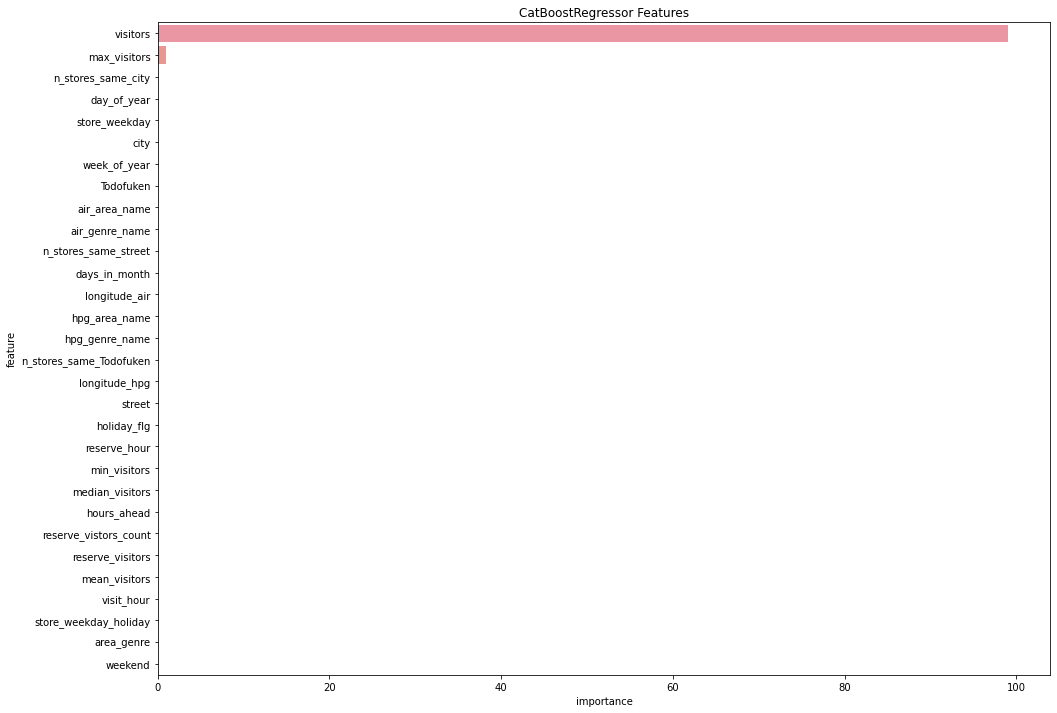

In [248]:
# Plot feature importance
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", 
            y="feature", 
            data=feature_importance_df.sort_values(by="importance", ascending=False));
            
plt.title('CatBoostRegressor Features');